<div align="center">
 <img src="https://raw.githubusercontent.com/matheusmota/dataviz2018/master/resources/images/logo_facens_pos.png" width="150px">
 <h1> Especialização em Ciência de Dados - Centro Universitário Facens</h1>
 <h2> Trabalho de Conclusão de Curso em Ciência de Dados</h2>
</div>
<br><br>


## Análise da qualidade dos dados públicos referentes à notificação de síndrome gripal suspeitos de COVID-19 para o estado de São Paulo

Freitas, Lucas S.  Gregorin, Livia V. Mendonça, Beatriz C. M. Lochter, Johannes V.


lucas-souzad@hotmail.com, liviagregorin@gmail.com, beacristinamm@gmail.com, johannes.lochter@facens.br

# Instalando pacotes e importando bibliotecas

In [2]:
#instalando pyspark

!pip install pyspark 

In [3]:
!pip install pyarrow

In [4]:
#análises parciais com Pandas
import pyspark.pandas as ps
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer


#bibliotecas complementares pySpark
import pyspark.sql.functions as F
from pyspark.sql.types import StructField, ArrayType, StringType, StructType
from pyspark.ml.feature import CountVectorizer
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, asc, desc, count, isnan, when, lit, round, to_date, avg, split, to_date
from pyspark.sql import DataFrame
import pyspark.sql.types
from pyspark.sql.types import DoubleType
import pyspark.sql.functions as sql_fun


import findspark
findspark.init()
findspark.find()


import seaborn as sns
import plotly
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [7]:
#bibliteca para mostras melhor as informações

from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

from pyspark.sql.functions import lit,col,round, max, when

# Importando CSVs

In [5]:
spark = SparkSession.builder.appName('DataFrame').config('spark.master','local').getOrCreate()

path = ['/Users/souza.lucas/Desktop/TCC/2022/2022lote1.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote2.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote3.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote4.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote5.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote6.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote7.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote8.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote9.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote10.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote11.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote12.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote13.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote14.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote15.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote16.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote17.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote18.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote19.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote20.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote21.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote22.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote23.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote24.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote25.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote26.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote27.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote28.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote29.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote30.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote31.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote32.csv',
        '/Users/souza.lucas/Desktop/TCC/2022/2022lote33.csv'
       ]
  
df = spark.read.csv(path, sep=';', inferSchema=True, header=True)

## Verificação dos dados de identificação do paciente

In [6]:
Total = df.count()
print(Total)

15573511


In [8]:
#seleção dos colunas referente à identificacao do paciente
df_identificacao = df.select('estadoNotificacao',                 
                             'estadoNotificacaoIBGE',             
                             'municipioNotificacao',              
                             'municipioNotificacaoIBGE',          
                             'profissionalSaude',                 
                             'profissionalSeguranca',             
                             'cbo',                               
                             'idade',                             
                             'sexo',                              
                             'racaCor',                           
                             'codigoContemComunidadeTradicional', 
                             'estado',
                             'estadoIBGE',
                             'municipio',
                             'municipioIBGE')

In [9]:
#estadoNotificacao (Obrigatório)
df_identificacao.groupBy('estadoNotificacao').count()\
                .select('estadoNotificacao',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(10,False)

#Possui preenchimento errado

+-----------------+--------+--------+
|estadoNotificacao|Qtd     |%       |
+-----------------+--------+--------+
|Bahia            |26      |2.0E-6  |
|São Paulo        |15573482|0.999998|
|None             |3       |0.0     |
+-----------------+--------+--------+



In [10]:
#estadoNotificacaoIBGE
df_identificacao.groupBy('estadoNotificacaoIBGE').count()\
                .select('estadoNotificacaoIBGE',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(10,False)

#Possui preenchimento errado

+---------------------+--------+--------+
|estadoNotificacaoIBGE|Qtd     |%       |
+---------------------+--------+--------+
|null                 |839452  |0.053903|
|SP                   |14734057|0.946097|
|29                   |2       |0.0     |
+---------------------+--------+--------+



In [11]:
#municipioNotificacao (Obrigatório)
df_identificacao.groupBy('municipioNotificacao').count()\
                .select('municipioNotificacao',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('municipioNotificacao').show(5,False)

print('Qtd de Municipios: ',df_identificacao.groupBy('municipioNotificacao').count().count())
#645

#Possui linhas vazias, as preenchidas estão de acordo com o dicionário

+--------------------+-----+--------+
|municipioNotificacao|Qtd  |%       |
+--------------------+-----+--------+
|null                |3584 |2.3E-4  |
|Adamantina          |17189|0.001104|
|Adolfo              |2746 |1.76E-4 |
|Aguaí               |16406|0.001053|
|Agudos              |6243 |4.01E-4 |
+--------------------+-----+--------+
only showing top 5 rows

Qtd de Municipios:  646


In [12]:
#municipioNotificacaoIBGE
df_identificacao.groupBy('municipioNotificacaoIBGE').count()\
                .select('municipioNotificacaoIBGE',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('municipioNotificacaoIBGE').show(5,False)

print('Qtd de Municipios: ',df_identificacao.groupBy('municipioNotificacaoIBGE').count().count())

#Possui preenchimento errado e possui mais de um codigo para o mesmo município

+------------------------+------+--------+
|municipioNotificacaoIBGE|Qtd   |%       |
+------------------------+------+--------+
|null                    |843032|0.054132|
|3                       |3     |0.0     |
|1304062                 |128   |8.0E-6  |
|1400050                 |944   |6.1E-5  |
|2103109                 |5446  |3.5E-4  |
+------------------------+------+--------+
only showing top 5 rows

Qtd de Municipios:  686


In [13]:
#profissionalSaude (obrigatório)
df_identificacao.groupBy('profissionalSaude').count()\
                .select('profissionalSaude',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(5,False)

#Possui linhas vazias, as preenchidas estão de acordo com o dicionário

+-----------------+--------+--------+
|profissionalSaude|Qtd     |%       |
+-----------------+--------+--------+
|Não              |15326248|0.984123|
|Sim              |246786  |0.015847|
|null             |477     |3.1E-5  |
+-----------------+--------+--------+



In [14]:
#profissionalSeguranca
df_identificacao.groupBy('profissionalSeguranca').count()\
                .select('profissionalSeguranca',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(5,False)

#Possui preenchimento errado

+---------------------+--------+--------+
|profissionalSeguranca|Qtd     |%       |
+---------------------+--------+--------+
|Não                  |15541904|0.99797 |
|null                 |11069   |7.11E-4 |
|Sim                  |20535   |0.001319|
|GBGbpPj25b           |1       |0.0     |
|fVLfiTbwqA           |1       |0.0     |
+---------------------+--------+--------+
only showing top 5 rows



In [15]:
#cbo (obrigatório se profissionalsaude = sim)
df_identificacao.groupBy('cbo').count()\
                .select('cbo',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('cbo').show(5,False)

print('Qtd profissoes: ',df_identificacao.groupBy('cbo').count().count())
print('Total: ',df_identificacao.select('cbo').filter(col('cbo').isNotNull()).count())

#Possui preenchimento errado

+---------------------------------------------+--------+--------+
|cbo                                          |Qtd     |%       |
+---------------------------------------------+--------+--------+
|null                                         |15080341|0.968333|
|0101 - Oficiais generais das forças armadas  |4324    |2.78E-4 |
|0102 - Oficiais das forças armadas           |8226    |5.28E-4 |
|0103 - Praças das forças armadas             |1088    |7.0E-5  |
|0201 - Oficiais superiores da polícia militar|420     |2.7E-5  |
+---------------------------------------------+--------+--------+
only showing top 5 rows

Qtd profissoes:  628
Total:  493170


In [16]:
#idade  -----------------------
df_identificacao.groupBy('idade').count()\
                .select('idade',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('idade').show(5,False)

df_identificacao.groupBy('idade').count()\
                .select('idade',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy(col('idade').desc()).show(5,False)

#Possui preenchimento errado

+-----+-------+--------+
|idade|Qtd    |%       |
+-----+-------+--------+
|null |3763687|0.241672|
|0    |106927 |0.006866|
|1    |154283 |0.009907|
|2    |154840 |0.009943|
|3    |157013 |0.010082|
+-----+-------+--------+
only showing top 5 rows

+-----+---+---+
|idade|Qtd|%  |
+-----+---+---+
|382  |1  |0.0|
|372  |1  |0.0|
|337  |1  |0.0|
|326  |1  |0.0|
|234  |1  |0.0|
+-----+---+---+
only showing top 5 rows



In [17]:
#sexo (Obrigatorio)
df_identificacao.groupBy('sexo').count()\
                .select('sexo',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(5,False)

#Possui preenchimento errado

+----------+-------+--------+
|sexo      |Qtd    |%       |
+----------+-------+--------+
|Feminino  |9004634|0.578202|
|Indefinido|2201   |1.41E-4 |
|Masculino |6566655|0.421655|
|null      |9      |1.0E-6  |
|Outro     |12     |1.0E-6  |
+----------+-------+--------+



In [18]:
#racaCor (Obrigatorio)
df_identificacao.groupBy('racaCor').count()\
                .select('racaCor',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(10,False)

#Possui preenchimento errado

+--------+-------+--------+
|racaCor |Qtd    |%       |
+--------+-------+--------+
|Ignorado|4549181|0.29211 |
|null    |9424   |6.05E-4 |
|Preta   |491785 |0.031578|
|Indigena|2564   |1.65E-4 |
|Amarela |258595 |0.016605|
|Branco  |362    |2.3E-5  |
|Branca  |7237726|0.464746|
|Parda   |3023871|0.194168|
|FD7219  |3      |0.0     |
+--------+-------+--------+



In [19]:
#codigoContemComunidadeTradicional (Obrigatorio)
df_identificacao.groupBy('codigoContemComunidadeTradicional').count()\
                .select('codigoContemComunidadeTradicional',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).show(5,False)

#Possui linhas vazias, as preenchidas estão de acordo com o dicionario

+---------------------------------+--------+--------+
|codigoContemComunidadeTradicional|Qtd     |%       |
+---------------------------------+--------+--------+
|null                             |286459  |0.018394|
|1                                |40165   |0.002579|
|2                                |15246887|0.979027|
+---------------------------------+--------+--------+



In [20]:
#estado (Obrigatorio)
df_identificacao.groupBy('estado').count()\
                .select('estado',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('estado').show(35,False)

print('Qtd estado: ',df_identificacao.groupBy('estado').count().count())
#27 (sem null)

#Possui preenchimento errado

+-------------------+--------+--------+
|estado             |Qtd     |%       |
+-------------------+--------+--------+
|null               |20      |1.0E-6  |
|Acre               |703     |4.5E-5  |
|Alagoas            |3367    |2.16E-4 |
|Amapá              |410     |2.6E-5  |
|Amazonas           |2606    |1.67E-4 |
|Bahia              |20402   |0.00131 |
|Ceará              |8369    |5.37E-4 |
|Distrito Federal   |9026    |5.8E-4  |
|Espírito Santo     |3590    |2.31E-4 |
|Goiás              |6991    |4.49E-4 |
|MG                 |1       |0.0     |
|MT                 |1       |0.0     |
|Maranhão           |3438    |2.21E-4 |
|Mato Grosso        |4101    |2.63E-4 |
|Mato Grosso do Sul |5478    |3.52E-4 |
|Minas Gerais       |39394   |0.00253 |
|Paraná             |17569   |0.001128|
|Paraíba            |5610    |3.6E-4  |
|Pará               |3501    |2.25E-4 |
|Pernambuco         |10458   |6.72E-4 |
|Piauí              |3592    |2.31E-4 |
|RJ                 |1       |0.0     |


In [21]:
#estadoIBGE
df_identificacao.groupBy('estadoIBGE').count()\
                .select('estadoIBGE',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('estadoIBGE').show(30,False)

print('Qtd estado: ',df_identificacao.groupBy('estadoIBGE').count().count())

#Possui preenchimento errado

+----------+--------+--------+
|estadoIBGE|Qtd     |%       |
+----------+--------+--------+
|null      |361110  |0.023187|
|1         |3       |0.0     |
|AC        |492     |3.2E-5  |
|AL        |3346    |2.15E-4 |
|AM        |2593    |1.67E-4 |
|AP        |401     |2.6E-5  |
|BA        |19877   |0.001276|
|CE        |8305    |5.33E-4 |
|DF        |8851    |5.68E-4 |
|ES        |3564    |2.29E-4 |
|GO        |6627    |4.26E-4 |
|MA        |3419    |2.2E-4  |
|MG        |38015   |0.002441|
|MS        |5269    |3.38E-4 |
|MT        |4018    |2.58E-4 |
|PA        |3452    |2.22E-4 |
|PB        |5585    |3.59E-4 |
|PE        |10316   |6.62E-4 |
|PI        |3530    |2.27E-4 |
|PR        |17351   |0.001114|
|RJ        |24791   |0.001592|
|RN        |3868    |2.48E-4 |
|RO        |1510    |9.7E-5  |
|RR        |556     |3.6E-5  |
|RS        |7733    |4.97E-4 |
|SC        |10667   |6.85E-4 |
|SE        |1851    |1.19E-4 |
|SP        |15015416|0.964164|
|TO        |995     |6.4E-5  |
+-------

In [22]:
#municipio (Obrigatorio)
df_identificacao.groupBy('municipio').count()\
                .select('municipio',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('municipio').show(5,False)

print('Qtd municipio: ',df_identificacao.groupBy('municipio').count().count())
#5568

#Possui preenchimento errado

+---------------+---+------+
|municipio      |Qtd|%     |
+---------------+---+------+
|null           |24 |2.0E-6|
|2021-09-09     |1  |0.0   |
|2021-09-26     |1  |0.0   |
|2021-10-11     |1  |0.0   |
|Abadia de Goiás|8  |1.0E-6|
+---------------+---+------+
only showing top 5 rows

Qtd municipio:  4760


In [23]:
#municipioIBGE
df_identificacao.groupBy('municipioIBGE').count()\
                .select('municipioIBGE',
                        col('count').alias('Qtd'),
                        round((col('count')/Total), 6).alias('%')).orderBy('municipioIBGE').show(5,False)

print('Qtd municipio: ',df_identificacao.groupBy('municipioIBGE').count().count())
#5568

#Possui preenchimento errado e possui mais de um codigo para o mesmo municipio

+-------------+------+--------+
|municipioIBGE|Qtd   |%       |
+-------------+------+--------+
|null         |368762|0.023679|
|1100015      |33    |2.0E-6  |
|1100023      |125   |8.0E-6  |
|1100031      |3     |0.0     |
|1100049      |116   |7.0E-6  |
+-------------+------+--------+
only showing top 5 rows

Qtd municipio:  4993


In [24]:
#estadoNotificacao
Total_erro = df.filter(col('estadoNotificacao').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('estadoNotificacao') == 'São Paulo','Sem Erro').otherwise('Com Erro').alias('estadoNotificacao_erro'))

df_erro.groupBy('estadoNotificacao_erro').count()\
       .select('estadoNotificacao_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573511
+----------------------+--------+---------+
|estadoNotificacao_erro|Qtd     |%        |
+----------------------+--------+---------+
|Com Erro              |29      |1.86E-4  |
|Sem Erro              |15573482|99.999814|
+----------------------+--------+---------+



In [25]:
#estadoNotificacaoIBGE
Total_erro = df.filter(col('estadoNotificacaoIBGE').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('estadoNotificacaoIBGE') == 'SP','Sem Erro').otherwise('Com Erro').alias('estadoNotificacaoIBGE_erro'))

df_erro.groupBy('estadoNotificacaoIBGE_erro').count()\
       .select('estadoNotificacaoIBGE_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  14734059
+--------------------------+--------+---------+
|estadoNotificacaoIBGE_erro|Qtd     |%        |
+--------------------------+--------+---------+
|Sem Erro                  |14734057|99.999986|
|Com Erro                  |2       |1.4E-5   |
+--------------------------+--------+---------+



In [26]:
#municipioNotificacao
Total_erro = df.filter(col('municipioNotificacao').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('municipioNotificacao') == None,'Com Erro').otherwise('Sem Erro').alias('municipioNotificacao_erro'))

df_erro.groupBy('municipioNotificacao_erro').count()\
       .select('municipioNotificacao_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15569927
+-------------------------+--------+-----+
|municipioNotificacao_erro|Qtd     |%    |
+-------------------------+--------+-----+
|Sem Erro                 |15569927|100.0|
+-------------------------+--------+-----+



In [27]:
#municipioNotificacaoIBGE
Total_erro = df.filter(col('municipioNotificacaoIBGE').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('municipioNotificacaoIBGE') == 3,'Com Erro').otherwise('Sem Erro').alias('municipioNotificacaoIBGE_erro'))

df_erro.groupBy('municipioNotificacaoIBGE_erro').count()\
       .select('municipioNotificacaoIBGE_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  14730479
+-----------------------------+--------+--------+
|municipioNotificacaoIBGE_erro|Qtd     |%       |
+-----------------------------+--------+--------+
|Sem Erro                     |14730476|99.99998|
|Com Erro                     |3       |2.0E-5  |
+-----------------------------+--------+--------+



In [28]:
#profissionalSaude
Total_erro = df.filter(col('profissionalSaude').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('profissionalSaude_erro'))

df_erro.groupBy('profissionalSaude_erro').count()\
       .select('profissionalSaude_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573034
+----------------------+--------+-----+
|profissionalSaude_erro|Qtd     |%    |
+----------------------+--------+-----+
|Sem Erro              |15573034|100.0|
+----------------------+--------+-----+



In [29]:
#profissionalSeguranca
Total_erro = df.filter(col('profissionalSeguranca').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('profissionalSeguranca') == 'mfybIEBpCQ') | (col('profissionalSeguranca') == 'GBGbpPj25b'),'Com Erro').otherwise('Sem Erro').alias('profissionalSeguranca_erro'))

df_erro.groupBy('profissionalSeguranca_erro').count()\
       .select('profissionalSeguranca_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15562442
+--------------------------+--------+---------+
|profissionalSeguranca_erro|Qtd     |%        |
+--------------------------+--------+---------+
|Sem Erro                  |15562440|99.999987|
|Com Erro                  |2       |1.3E-5   |
+--------------------------+--------+---------+



In [30]:
#cbo
Total_erro = df.filter(col('cbo').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('cbo') == 'false','Com Erro').otherwise('Sem Erro').alias('cbo_erro'))

df_erro.groupBy('cbo_erro').count()\
       .select('cbo_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  493170
+--------+------+---------+
|cbo_erro|Qtd   |%        |
+--------+------+---------+
|Sem Erro|493167|99.999392|
|Com Erro|3     |6.08E-4  |
+--------+------+---------+



In [31]:
#idade
Total_erro = df.filter(col('idade').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('idade') >= 121,'Com Erro').otherwise('Sem Erro').alias('idade_erro'))

df_erro.groupBy('idade_erro').count()\
       .select('idade_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  11809824
+----------+--------+---------+
|idade_erro|Qtd     |%        |
+----------+--------+---------+
|Sem Erro  |11809813|99.999907|
|Com Erro  |11      |9.3E-5   |
+----------+--------+---------+



In [32]:
#sexo
Total_erro = df.filter(col('sexo').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('sexo') == 'Feminino') | 
                                 (col('sexo') == 'Masculino' ),'Sem Erro').otherwise('Com Erro').alias('sexo_erro'))

df_erro.groupBy('sexo_erro').count()\
       .select('sexo_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573502
+---------+--------+--------+
|sexo_erro|Qtd     |%       |
+---------+--------+--------+
|Com Erro |2213    |0.01421 |
|Sem Erro |15571289|99.98579|
+---------+--------+--------+



In [33]:
#racaCor
Total_erro = df.filter(col('racaCor').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('racaCor') == 'FD7219') | 
                                 (col('racaCor') == 'Branco'),'Com Erro').otherwise('Sem Erro').alias('racaCor_erro'))

df_erro.groupBy('racaCor_erro').count()\
       .select('racaCor_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15564087
+------------+--------+---------+
|racaCor_erro|Qtd     |%        |
+------------+--------+---------+
|Com Erro    |365     |0.002345 |
|Sem Erro    |15563722|99.997655|
+------------+--------+---------+



In [34]:
#codigoContemComunidadeTradicional
Total_erro = df.filter(col('codigoContemComunidadeTradicional').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoContemComunidadeTradicional_erro'))

df_erro.groupBy('codigoContemComunidadeTradicional_erro').count()\
       .select('codigoContemComunidadeTradicional_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15287052
+--------------------------------------+--------+-----+
|codigoContemComunidadeTradicional_erro|Qtd     |%    |
+--------------------------------------+--------+-----+
|Sem Erro                              |15287052|100.0|
+--------------------------------------+--------+-----+



In [35]:
#estado
Total_erro = df.filter(col('estado').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('estado') == 'MG') | 
                                 (col('estado') == 'MT') | 
                                 (col('estado') == 'RJ') | 
                                 (col('estado') == 'SP') | 
                                 (col('estado') == 'SAO PAULO') | 
                                 (col('estado') == 'SÃO PAULO'),'Com Erro').otherwise('Sem Erro').alias('estado_erro'))

df_erro.groupBy('estado_erro').count()\
       .select('estado_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573491
+-----------+--------+---------+
|estado_erro|Qtd     |%        |
+-----------+--------+---------+
|Sem Erro   |15573376|99.999262|
|Com Erro   |115     |7.38E-4  |
+-----------+--------+---------+



In [36]:
#estadoIBGE
Total_erro = df.filter(col('estadoIBGE').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('estadoIBGE') == 1,'Com Erro').otherwise('Sem Erro').alias('estadoIBGE_erro'))

df_erro.groupBy('estadoIBGE_erro').count()\
       .select('estadoIBGE_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15212401
+---------------+--------+--------+
|estadoIBGE_erro|Qtd     |%       |
+---------------+--------+--------+
|Sem Erro       |15212398|99.99998|
|Com Erro       |3       |2.0E-5  |
+---------------+--------+--------+



In [37]:
#municipio
Total_erro = df.filter(col('municipio').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('municipio') == '2021-09-09') | 
                                 (col('municipio') == '2021-09-26') | 
                                 (col('municipio') == '2021-10-11'),'Com Erro').otherwise('Sem Erro').alias('municipio_erro'))

df_erro.groupBy('municipio_erro').count()\
       .select('municipio_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573487
+--------------+--------+---------+
|municipio_erro|Qtd     |%        |
+--------------+--------+---------+
|Sem Erro      |15573484|99.999981|
|Com Erro      |3       |1.9E-5   |
+--------------+--------+---------+



In [38]:
#municipioIBGE
Total_erro = df.filter(col('municipioIBGE').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('municipioIBGE') == '2021-09-25') | 
                                 (col("municipioIBGE").cast("int").isNull()),'Com Erro').otherwise('Sem Erro').alias('municipioIBGE_erro'))

df_erro.groupBy('municipioIBGE_erro').count()\
       .select('municipioIBGE_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15204749
+------------------+--------+---------+
|municipioIBGE_erro|Qtd     |%        |
+------------------+--------+---------+
|Com Erro          |28187   |0.185383 |
|Sem Erro          |15176562|99.814617|
+------------------+--------+---------+



## Verificação dos dados de Estratégia e Local de Realização da Testagem

In [39]:
df_testagem = df.select('codigoEstrategiaCovid',
                        'codigoBuscaAtivaAssintomatico',
                        'outroBuscaAtivaAssintomatico',
                        'codigoTriagemPopulacaoEspecifica',
                        'outroTriagemPopulacaoEspecifica',
                        'codigoLocalRealizacaoTestagem',
                        'outroLocalRealizacaoTestagem')

In [40]:
#codigoEstrategiaCovid
df_testagem.groupBy('codigoEstrategiaCovid').count()\
           .select('codigoEstrategiaCovid',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('codigoEstrategiaCovid').show(5,False)

#Possui linhas vazias, as preenchidas estão de acordo com o dicionario

+---------------------+--------+--------+
|codigoEstrategiaCovid|Qtd     |%       |
+---------------------+--------+--------+
|null                 |745798  |0.047889|
|1                    |13894010|0.892157|
|2                    |824933  |0.05297 |
|3                    |108770  |0.006984|
+---------------------+--------+--------+



In [41]:
#codigoBuscaAtivaAssintomatico (Obrigatorio se codigoEstrategiaCovid = 2)
df_testagem.groupBy('codigoBuscaAtivaAssintomatico').count()\
           .select('codigoBuscaAtivaAssintomatico',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('codigoBuscaAtivaAssintomatico').show(5,False)

print('Total Preenchido: ',df_testagem.select('codigoBuscaAtivaAssintomatico')
                                      .filter(col('codigoBuscaAtivaAssintomatico').isNotNull()).count())

#Preenchimento está de acordo com o dicionario e possui mais respostas que codigoEstrategiaCovid=2

+-----------------------------+--------+--------+
|codigoBuscaAtivaAssintomatico|Qtd     |%       |
+-----------------------------+--------+--------+
|null                         |14745943|0.946861|
|1                            |391274  |0.025124|
|2                            |153058  |0.009828|
|3                            |145023  |0.009312|
|4                            |138213  |0.008875|
+-----------------------------+--------+--------+

Total Preenchido:  827568


In [42]:
#outroBuscaAtivaAssintomatico (Obrigatorio se codigoBuscaAtivaAssintomatico = 4)
df_testagem.groupBy('outroBuscaAtivaAssintomatico').count()\
           .select('outroBuscaAtivaAssintomatico',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('outroBuscaAtivaAssintomatico').show(5,False)

print('Total Preenchido: ',df_testagem.select('outroBuscaAtivaAssintomatico')
                                      .filter(col('outroBuscaAtivaAssintomatico').isNotNull()).count())

#Não é possivel categorizar se preenchimento está errado, possui menos preenchimento que codigoBuscaAtivaAssintomatico=4

+----------------------------+--------+--------+
|outroBuscaAtivaAssintomatico|Qtd     |%       |
+----------------------------+--------+--------+
|null                        |15436075|0.991175|
|(12) 98843-8484             |1       |0.0     |
|(16) 2105-5300              |31      |2.0E-6  |
|***                         |1       |0.0     |
|*****                       |2       |0.0     |
+----------------------------+--------+--------+
only showing top 5 rows

Total Preenchido:  137436


In [43]:
#codigoTriagemPopulacaoEspecifica (Obrigatorio se codigoEstrategiaCovid = 3)
df_testagem.groupBy('codigoTriagemPopulacaoEspecifica').count()\
           .select('codigoTriagemPopulacaoEspecifica',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('codigoTriagemPopulacaoEspecifica').show(6,False)

print('Total Preenchido: ',df_testagem.select('codigoTriagemPopulacaoEspecifica')
                                      .filter(col('codigoTriagemPopulacaoEspecifica').isNotNull()).count())

#Preenchimento está de acordo com o dicionario e possui mais respostas que codigoEstrategiaCovid=3

+--------------------------------+--------+--------+
|codigoTriagemPopulacaoEspecifica|Qtd     |%       |
+--------------------------------+--------+--------+
|null                            |15464155|0.992978|
|1                               |19797   |0.001271|
|2                               |6428    |4.13E-4 |
|3                               |6341    |4.07E-4 |
|4                               |41356   |0.002656|
|5                               |35434   |0.002275|
+--------------------------------+--------+--------+

Total Preenchido:  109356


In [44]:
#outroTriagemPopulacaoEspecifica (Obrigatorio se codigoTriagemPopulacaoEspecifica = 5)
df_testagem.groupBy('outroTriagemPopulacaoEspecifica').count()\
           .select('outroTriagemPopulacaoEspecifica',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('outroTriagemPopulacaoEspecifica').show(5,False)

print('Total Preenchido: ',df_testagem.select('outroTriagemPopulacaoEspecifica')
                                      .filter(col('outroTriagemPopulacaoEspecifica').isNotNull()).count())

#Não é possivel categorizar se preenchimento está errado, possui menos preenchimento que codigoTriagemPopulacaoEspecifica=5

+--------------------------------------+--------+--------+
|outroTriagemPopulacaoEspecifica       |Qtd     |%       |
+--------------------------------------+--------+--------+
|null                                  |15538353|0.997742|
|---                                   |160     |1.0E-5  |
|----                                  |4       |0.0     |
|--------                              |1       |0.0     |
|-PROTOCOLO DE TRANSFERENCIA HOSPITALAR|1       |0.0     |
+--------------------------------------+--------+--------+
only showing top 5 rows

Total Preenchido:  35158


In [45]:
#codigoLocalRealizacaoTestagem (Obrigatorio)
df_testagem.groupBy('codigoLocalRealizacaoTestagem').count()\
           .select('codigoLocalRealizacaoTestagem',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('codigoLocalRealizacaoTestagem').show(8,False)

#Possui linhas vazias, as preenchidas estão de acordo com o dicionario

+-----------------------------+--------+--------+
|codigoLocalRealizacaoTestagem|Qtd     |%       |
+-----------------------------+--------+--------+
|null                         |745796  |0.047889|
|1                            |12359313|0.793611|
|2                            |131411  |0.008438|
|3                            |128236  |0.008234|
|4                            |1726447 |0.110858|
|5                            |10607   |6.81E-4 |
|6                            |26458   |0.001699|
|7                            |445243  |0.02859 |
+-----------------------------+--------+--------+



In [46]:
#codigoLocalRealizacaoTestagem (Obrigatorio se codigoLocalRealizacaoTestagem = 7)
df_testagem.groupBy('outroLocalRealizacaoTestagem').count()\
           .select('outroLocalRealizacaoTestagem',
                   col('count').alias('Qtd'),
                   round((col('count')/Total), 6).alias('%')).orderBy('outroLocalRealizacaoTestagem').show(5,False)

print('Total Preenchido: ',df_testagem.select('outroLocalRealizacaoTestagem')
                                      .filter(col('outroLocalRealizacaoTestagem').isNotNull()).count())

#Não é possivel categorizar se preenchimento está errado, possui menos preenchimento que codigoTriagemPopulacaoEspecifica=5

+--------------------------------------------------------------------------------------------------+--------+--------+
|outroLocalRealizacaoTestagem                                                                      |Qtd     |%       |
+--------------------------------------------------------------------------------------------------+--------+--------+
|null                                                                                              |15128297|0.971412|
|"pcte sem sintoma, notificado por exigência de testagem para viabilizar transferência de serviço".|1       |0.0     |
|(11) 99814-9666                                                                                   |1       |0.0     |
|(11)984230083                                                                                     |1       |0.0     |
|(12) 3682-1239                                                                                    |1       |0.0     |
+-----------------------------------------------

### Avaliação da Consistência dos Dados de Identificação do Paciente

In [47]:
#codigoEstrategiaCovid
Total_erro = df.filter(col('codigoEstrategiaCovid').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoEstrategiaCovid_erro'))

df_erro.groupBy('codigoEstrategiaCovid_erro').count()\
       .select('codigoEstrategiaCovid_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  14827713
+--------------------------+--------+-----+
|codigoEstrategiaCovid_erro|Qtd     |%    |
+--------------------------+--------+-----+
|Sem Erro                  |14827713|100.0|
+--------------------------+--------+-----+



In [48]:
#codigoBuscaAtivaAssintomatico
Total_erro = df.filter(col('codigoBuscaAtivaAssintomatico').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoBuscaAtivaAssintomatico_erro'))

df_erro.groupBy('codigoBuscaAtivaAssintomatico_erro').count()\
       .select('codigoBuscaAtivaAssintomatico_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  827568
+----------------------------------+------+-----+
|codigoBuscaAtivaAssintomatico_erro|Qtd   |%    |
+----------------------------------+------+-----+
|Sem Erro                          |827568|100.0|
+----------------------------------+------+-----+



In [49]:
#codigoTriagemPopulacaoEspecifica
Total_erro = df.filter(col('codigoTriagemPopulacaoEspecifica').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoTriagemPopulacaoEspecifica_erro'))

df_erro.groupBy('codigoTriagemPopulacaoEspecifica_erro').count()\
       .select('codigoTriagemPopulacaoEspecifica_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  109356
+-------------------------------------+------+-----+
|codigoTriagemPopulacaoEspecifica_erro|Qtd   |%    |
+-------------------------------------+------+-----+
|Sem Erro                             |109356|100.0|
+-------------------------------------+------+-----+



In [50]:
#codigoLocalRealizacaoTestagem
Total_erro = df.filter(col('codigoLocalRealizacaoTestagem').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoLocalRealizacaoTestagem_erro'))

df_erro.groupBy('codigoLocalRealizacaoTestagem_erro').count()\
       .select('codigoLocalRealizacaoTestagem_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  14827715
+----------------------------------+--------+-----+
|codigoLocalRealizacaoTestagem_erro|Qtd     |%    |
+----------------------------------+--------+-----+
|Sem Erro                          |14827715|100.0|
+----------------------------------+--------+-----+



### Verificação dos dados Clínicos Epidemiológicos

In [51]:
df_clinico = df.select('dataNotificacao',               
                       'sintomas',                      
                       'outrosSintomas',                
                       'dataInicioSintomas',            
                       'condicoes',                     
                       'outrasCondicoes',               
                       'codigoRecebeuVacina',           
                       'codigoDosesVacina',             
                       'dataPrimeiraDose',              
                       'dataSegundaDose',               
                       'codigoLaboratorioPrimeiraDose', 
                       'codigoLaboratorioSegundaDose',  
                       'lotePrimeiraDose',              
                       'loteSegundaDose',
                       'totalTestesRealizados',
                       'codigoTipoTeste1',
                       'codigoEstadoTeste1',
                       'dataColetaTeste1',
                       'codigoResultadoTeste1',
                       'codigoFabricanteTeste1',
                       'codigoTipoTeste2',
                       'codigoEstadoTeste2',
                       'dataColetaTeste2',
                       'codigoResultadoTeste2',
                       'codigoFabricanteTeste2',
                       'codigoTipoTeste3',
                       'codigoEstadoTeste3',
                       'dataColetaTeste3',
                       'codigoResultadoTeste3',
                       'codigoFabricanteTeste3',
                       'codigoTipoTeste4',
                       'codigoEstadoTeste4',
                       'dataColetaTeste4',
                       'codigoResultadoTeste4',
                       'codigoFabricanteTeste4',
                       'evolucaoCaso',
                       'classificacaoFinal',
                       'dataEncerramento',
                       'origem',                         
                       'excluido',                       
                       'validado')                       

In [52]:
#dataNotificacao (Obrigatorio)
df_clinico.groupBy('dataNotificacao').count()\
          .select('dataNotificacao',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataNotificacao').show(5,False)

df_clinico.groupBy('dataNotificacao').count()\
          .select('dataNotificacao',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy(col('dataNotificacao').desc()).show(5,False)

#Possui preenchimento errado (ser maior que 01/01/2020)

+---------------+---+---+
|dataNotificacao|Qtd|%  |
+---------------+---+---+
|null           |6  |0.0|
|1972-02-03     |1  |0.0|
|1972-07-25     |1  |0.0|
|1973-03-07     |1  |0.0|
|1974-05-28     |1  |0.0|
+---------------+---+---+
only showing top 5 rows

+---------------+------+--------+
|dataNotificacao|Qtd   |%       |
+---------------+------+--------+
|None           |259712|0.016677|
|2023-01-28     |3     |0.0     |
|2023-01-27     |7     |0.0     |
|2023-01-26     |10    |1.0E-6  |
|2023-01-25     |10    |1.0E-6  |
+---------------+------+--------+
only showing top 5 rows



In [53]:
#sintomas (Obrigatorio)
df_clinico.groupBy('sintomas').count()\
          .select('sintomas',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('sintomas').show(5,False)

#Possui preenchimento errado

+------------------------------------------------------------------+-------+--------+
|sintomas                                                          |Qtd    |%       |
+------------------------------------------------------------------+-------+--------+
|null                                                              |393    |2.5E-5  |
|      BELGIUM NV - BELGICA"                                       |3      |0.0     |
|Assintomático                                                     |2641089|0.169589|
|Assintomático, Coriza                                             |45     |3.0E-6  |
|Assintomático, Coriza, Distúrbios Olfativos, Distúrbios Gustativos|1      |0.0     |
+------------------------------------------------------------------+-------+--------+
only showing top 5 rows



In [54]:
#outrosSintomas (Obrigatorio se sintomas contém "Outros")
df_clinico.groupBy('outrosSintomas').count()\
          .select('outrosSintomas',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('outrosSintomas').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+-------------------------------------------------+--------+--------+
|outrosSintomas                                   |Qtd     |%       |
+-------------------------------------------------+--------+--------+
|null                                             |12275768|0.788247|
|" - MOLEZA, INDIPISIÇÃO E VERMELIDÃO NA GARGANTA"|1       |0.0     |
|" DOR NO PULMAO"                                 |1       |0.0     |
|" DOR NOS OLHOS "                                |1       |0.0     |
|" DOR NOS OLHOS"                                 |1       |0.0     |
+-------------------------------------------------+--------+--------+
only showing top 5 rows



In [55]:
#dataInicioSintomas (Obrigatorio)
df_clinico.groupBy('dataInicioSintomas').count()\
          .select('dataInicioSintomas',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataInicioSintomas').show(5,False)

#Possui preenchimento errado (ser maior que 01/01/2020)

+------------------+---+---+
|dataInicioSintomas|Qtd|%  |
+------------------+---+---+
|null              |6  |0.0|
|1970-01-02        |1  |0.0|
|1970-02-16        |1  |0.0|
|1970-02-24        |1  |0.0|
|1970-03-17        |1  |0.0|
+------------------+---+---+
only showing top 5 rows



In [56]:
#condicoes
df_clinico.groupBy('condicoes').count()\
          .select('condicoes',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('condicoes').show(5,False)

#Possui preenchimento errado

+--------------------------------------------------------------------------------------------------------------------------------------------------+--------+--------+
|condicoes                                                                                                                                         |Qtd     |%       |
+--------------------------------------------------------------------------------------------------------------------------------------------------+--------+--------+
|null                                                                                                                                              |13992618|0.898488|
|Diabetes                                                                                                                                          |143987  |0.009246|
|Diabetes, Doenças cardíacas crônicas                                                                                                              |33371   |0.002143

In [57]:
#outrasCondicoes
df_clinico.groupBy('outrasCondicoes').count()\
          .select('outrasCondicoes',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('outrasCondicoes').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+--------------------------------------+--------+--------+
|outrasCondicoes                       |Qtd     |%       |
+--------------------------------------+--------+--------+
|null                                  |15110340|0.970259|
|"COLOCOU STENT NO CORAÇÃO".           |1       |0.0     |
|"Calculos Renais e Esteatose Hepatica"|1       |0.0     |
|"DOR NO PEITO E NAS COSTAS."          |1       |0.0     |
|"Flutter" e fibrilação atrial         |1       |0.0     |
+--------------------------------------+--------+--------+
only showing top 5 rows



In [58]:
#codigoRecebeuVacina
df_clinico.groupBy('codigoRecebeuVacina').count()\
          .select('codigoRecebeuVacina',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoRecebeuVacina').show(5,False)

#Preenchimento está de acordo com o dicionario

+-------------------+--------+--------+
|codigoRecebeuVacina|Qtd     |%       |
+-------------------+--------+--------+
|null               |1928269 |0.123817|
|1                  |11232804|0.721276|
|2                  |2288584 |0.146954|
|3                  |123854  |0.007953|
+-------------------+--------+--------+



In [59]:
#codigoDosesVacina
df_clinico.groupBy('codigoDosesVacina').count()\
          .select('codigoDosesVacina',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoDosesVacina').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+-----------------+-------+--------+
|codigoDosesVacina|Qtd    |%       |
+-----------------+-------+--------+
|null             |4992507|0.320577|
|0                |436    |2.8E-5  |
|1                |2064971|0.132595|
|1,2              |2513778|0.161414|
|1,2,3            |607958 |0.039038|
+-----------------+-------+--------+
only showing top 5 rows



In [60]:
#dataPrimeiraDose (Obrigatorio Automatico)
df_clinico.groupBy('dataPrimeiraDose').count()\
          .select('dataPrimeiraDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataPrimeiraDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+----------------+---+------+
|dataPrimeiraDose|Qtd|%     |
+----------------+---+------+
|null            |6  |0.0   |
|2020-03-23      |15 |1.0E-6|
|2020-06-04      |1  |0.0   |
|2020-06-05      |1  |0.0   |
|2020-06-25      |1  |0.0   |
+----------------+---+------+
only showing top 5 rows



In [61]:
#dataSegundaDose (Obrigatorio Automatico)
df_clinico.groupBy('dataSegundaDose').count()\
          .select('dataSegundaDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataSegundaDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+---------------+---+---+
|dataSegundaDose|Qtd|%  |
+---------------+---+---+
|null           |6  |0.0|
|2020-01-05     |1  |0.0|
|2020-08-18     |1  |0.0|
|2020-08-19     |4  |0.0|
|2020-08-20     |2  |0.0|
+---------------+---+---+
only showing top 5 rows



In [62]:
#codigoLaboratorioPrimeiraDose (Obrigatorio Automatico)
df_clinico.groupBy('codigoLaboratorioPrimeiraDose').count()\
          .select('codigoLaboratorioPrimeiraDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoLaboratorioPrimeiraDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+----------------------------------+-------+--------+
|codigoLaboratorioPrimeiraDose     |Qtd    |%       |
+----------------------------------+-------+--------+
|null                              |5687702|0.365216|
|1 - Coronavac - Sinovac (Butantan)|5      |0.0     |
|3 - Comirnaty (Pfizer)            |5      |0.0     |
|ASTRA ZENECA                      |9      |1.0E-6  |
|ASTRAZENECA                       |7453   |4.79E-4 |
+----------------------------------+-------+--------+
only showing top 5 rows



In [63]:
#codigoLaboratorioSegundaDose (Obrigatorio Automatico)
df_clinico.groupBy('codigoLaboratorioSegundaDose').count()\
          .select('codigoLaboratorioSegundaDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoLaboratorioSegundaDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+-------------------------------------------------+-------+--------+
|codigoLaboratorioSegundaDose                     |Qtd    |%       |
+-------------------------------------------------+-------+--------+
|null                                             |6573009|0.422063|
|1 - Coronavac - Sinovac (Butantan)               |2      |0.0     |
|2 - ChAdOx1nCoV-19 - Oxford/AstraZeneca (Fiocruz)|7      |0.0     |
|3 - Comirnaty (Pfizer)                           |2      |0.0     |
|ASTRA ZENECA                                     |6      |0.0     |
+-------------------------------------------------+-------+--------+
only showing top 5 rows



In [64]:
#lotePrimeiraDose
df_clinico.groupBy('lotePrimeiraDose').count()\
          .select('lotePrimeiraDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('lotePrimeiraDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+----------------+-------+-------+
|lotePrimeiraDose|Qtd    |%      |
+----------------+-------+-------+
|null            |5687750|0.36522|
|00              |2      |0.0    |
|000             |22     |1.0E-6 |
|0000            |6      |0.0    |
|00000000000     |2      |0.0    |
+----------------+-------+-------+
only showing top 5 rows



In [65]:
#loteSegundaDose (Obrigatorio Automatico)
df_clinico.groupBy('loteSegundaDose').count()\
          .select('loteSegundaDose',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('loteSegundaDose').show(5,False)

#Campo preenchido automaticamente pelo sistema

+---------------+-------+--------+
|loteSegundaDose|Qtd    |%       |
+---------------+-------+--------+
|null           |6573053|0.422066|
|000            |6      |0.0     |
|00000          |1      |0.0     |
|00000000000    |1      |0.0     |
|000000190160   |1      |0.0     |
+---------------+-------+--------+
only showing top 5 rows



In [66]:
#totalTestesRealizados
df_clinico.groupBy('totalTestesRealizados').count()\
          .select('totalTestesRealizados',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('totalTestesRealizados').show(18,False)

#Preenchimento está de acordo com o dicionario

+---------------------+--------+--------+
|totalTestesRealizados|Qtd     |%       |
+---------------------+--------+--------+
|null                 |6       |0.0     |
|1                    |14855467|0.953893|
|2                    |675155  |0.043353|
|3                    |37969   |0.002438|
|4                    |3821    |2.45E-4 |
|5                    |703     |4.5E-5  |
|6                    |197     |1.3E-5  |
|7                    |91      |6.0E-6  |
|8                    |43      |3.0E-6  |
|9                    |22      |1.0E-6  |
|10                   |14      |1.0E-6  |
|11                   |6       |0.0     |
|12                   |3       |0.0     |
|13                   |6       |0.0     |
|14                   |5       |0.0     |
|16                   |1       |0.0     |
|17                   |1       |0.0     |
|35                   |1       |0.0     |
+---------------------+--------+--------+



In [67]:
#codigoTipoTeste1
df_clinico.groupBy('codigoTipoTeste1').count()\
          .select('codigoTipoTeste1',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoTipoTeste1').show(10,False)

#Preenchimento está de acordo com o dicionario

+----------------+--------+--------+
|codigoTipoTeste1|Qtd     |%       |
+----------------+--------+--------+
|null            |1778111 |0.114175|
|1               |3431005 |0.22031 |
|2               |21021   |0.00135 |
|3               |10038149|0.644566|
|4               |138989  |0.008925|
|5               |94360   |0.006059|
|6               |1068    |6.9E-5  |
|7               |15274   |9.81E-4 |
|8               |22099   |0.001419|
|9               |33435   |0.002147|
+----------------+--------+--------+



In [68]:
#codigoEstadoTeste1
df_clinico.groupBy('codigoEstadoTeste1').count()\
          .select('codigoEstadoTeste1',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoEstadoTeste1').show(5,False)

#Preenchimento está de acordo com o dicionario

+------------------+--------+--------+
|codigoEstadoTeste1|Qtd     |%       |
+------------------+--------+--------+
|null              |1777988 |0.114167|
|1                 |289150  |0.018567|
|2                 |1080980 |0.069411|
|3                 |12132023|0.779017|
|4                 |293370  |0.018838|
+------------------+--------+--------+



In [69]:
#dataColetaTeste1
df_clinico.groupBy('dataColetaTeste1').count()\
          .select('dataColetaTeste1',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataColetaTeste1').show(5,False)

#Possui preenchimento errado (ser maior que 01/01/2020)

+-------------------+-------+--------+
|dataColetaTeste1   |Qtd    |%       |
+-------------------+-------+--------+
|null               |2361497|0.151635|
|1970-01-01 00:00:00|155    |1.0E-5  |
|2011-01-26 00:00:00|1      |0.0     |
|2020-01-01 00:00:00|22     |1.0E-6  |
|2020-01-02 00:00:00|83     |5.0E-6  |
+-------------------+-------+--------+
only showing top 5 rows



In [70]:
#codigoResultadoTeste1
df_clinico.groupBy('codigoResultadoTeste1').count()\
          .select('codigoResultadoTeste1',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoResultadoTeste1').show(5,False)

#Preenchimento está de acordo com o dicionario

+---------------------+-------+--------+
|codigoResultadoTeste1|Qtd    |%       |
+---------------------+-------+--------+
|null                 |3443831|0.221134|
|1                    |4240806|0.272309|
|2                    |7873958|0.505599|
|3                    |14916  |9.58E-4 |
+---------------------+-------+--------+



In [71]:
#codigoFabricanteTeste1
df_clinico.groupBy('codigoFabricanteTeste1').count()\
          .select('codigoFabricanteTeste1',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoFabricanteTeste1').show(5,False)

#Preenchimento está de acordo com o dicionario

+----------------------+-------+--------+
|codigoFabricanteTeste1|Qtd    |%       |
+----------------------+-------+--------+
|null                  |6446773|0.413958|
|1                     |8973   |5.76E-4 |
|2                     |173    |1.1E-5  |
|3                     |55     |4.0E-6  |
|4                     |20     |1.0E-6  |
+----------------------+-------+--------+
only showing top 5 rows



In [72]:
#codigoTipoTeste2
df_clinico.groupBy('codigoTipoTeste2').count()\
          .select('codigoTipoTeste2',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoTipoTeste2').show(11,False)

#Preenchimento está de acordo com o dicionario

+----------------+--------+--------+
|codigoTipoTeste2|Qtd     |%       |
+----------------+--------+--------+
|null            |14855475|0.953894|
|1               |323258  |0.020757|
|2               |1656    |1.06E-4 |
|3               |300538  |0.019298|
|4               |15958   |0.001025|
|5               |43916   |0.00282 |
|6               |554     |3.6E-5  |
|7               |15288   |9.82E-4 |
|8               |14781   |9.49E-4 |
|9               |2087    |1.34E-4 |
+----------------+--------+--------+



In [73]:
#codigoEstadoTeste2
df_clinico.groupBy('codigoEstadoTeste2').count()\
          .select('codigoEstadoTeste2',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoEstadoTeste2').show(5,False)

#Preenchimento está de acordo com o dicionario

+------------------+--------+--------+
|codigoEstadoTeste2|Qtd     |%       |
+------------------+--------+--------+
|null              |14855475|0.953894|
|1                 |53735   |0.00345 |
|2                 |116250  |0.007465|
|3                 |524813  |0.033699|
|4                 |23238   |0.001492|
+------------------+--------+--------+



In [74]:
#dataColetaTeste2
df_clinico.groupBy('dataColetaTeste2').count()\
          .select('dataColetaTeste2',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataColetaTeste2').show(5,False)

#Possui preenchimento errado (ser maior que 01/01/2020)

+----------------+-----+--------+
|dataColetaTeste2|Qtd  |%       |
+----------------+-----+--------+
|null            |76868|0.004936|
|1970-01-01      |16   |1.0E-6  |
|2020-01-01      |4    |0.0     |
|2020-01-02      |8    |1.0E-6  |
|2020-01-03      |3    |0.0     |
+----------------+-----+--------+
only showing top 5 rows



In [75]:
#codigoResultadoTeste2
df_clinico.groupBy('codigoResultadoTeste2').count()\
          .select('codigoResultadoTeste2',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoResultadoTeste2').show(5,False)

#Preenchimento está de acordo com o dicionario

+---------------------+--------+--------+
|codigoResultadoTeste2|Qtd     |%       |
+---------------------+--------+--------+
|null                 |15049262|0.966337|
|1                    |189914  |0.012195|
|2                    |332108  |0.021325|
|3                    |2227    |1.43E-4 |
+---------------------+--------+--------+



In [76]:
#codigoFabricanteTeste2
df_clinico.groupBy('codigoFabricanteTeste2').count()\
          .select('codigoFabricanteTeste2',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoFabricanteTeste2').show(5,False)

#Preenchimento está de acordo com o dicionario

+----------------------+--------+--------+
|codigoFabricanteTeste2|Qtd     |%       |
+----------------------+--------+--------+
|null                  |15342432|0.985162|
|1                     |2108    |1.35E-4 |
|2                     |17      |1.0E-6  |
|3                     |8       |1.0E-6  |
|4                     |7       |0.0     |
+----------------------+--------+--------+
only showing top 5 rows



In [77]:
#codigoTipoTeste3
df_clinico.groupBy('codigoTipoTeste3').count()\
          .select('codigoTipoTeste3',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoTipoTeste3').show(11,False)

#Preenchimento está de acordo com o dicionario

+----------------+--------+--------+
|codigoTipoTeste3|Qtd     |%       |
+----------------+--------+--------+
|null            |15530629|0.997246|
|1               |15647   |0.001005|
|2               |97      |6.0E-6  |
|3               |19873   |0.001276|
|4               |747     |4.8E-5  |
|5               |3424    |2.2E-4  |
|6               |41      |3.0E-6  |
|7               |1936    |1.24E-4 |
|8               |637     |4.1E-5  |
|9               |480     |3.1E-5  |
+----------------+--------+--------+



In [78]:
#codigoEstadoTeste3
df_clinico.groupBy('codigoEstadoTeste3').count()\
          .select('codigoEstadoTeste3',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoEstadoTeste3').show(5,False)

#Preenchimento está de acordo com o dicionario

+------------------+--------+--------+
|codigoEstadoTeste3|Qtd     |%       |
+------------------+--------+--------+
|null              |15530628|0.997246|
|1                 |9058    |5.82E-4 |
|2                 |3847    |2.47E-4 |
|3                 |28880   |0.001854|
|4                 |1098    |7.1E-5  |
+------------------+--------+--------+



In [79]:
#dataColetaTeste3
df_clinico.groupBy('dataColetaTeste3').count()\
          .select('dataColetaTeste3',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataColetaTeste3').show(5,False)

#Possui preenchimento errado (ser maior que 01/01/2020)

+----------------+-----+-------+
|dataColetaTeste3|Qtd  |%      |
+----------------+-----+-------+
|null            |10188|6.54E-4|
|1970-01-01      |2    |0.0    |
|2020-01-02      |1    |0.0    |
|2020-01-03      |2    |0.0    |
|2020-01-04      |3    |0.0    |
+----------------+-----+-------+
only showing top 5 rows



In [80]:
#codigoResultadoTeste3
df_clinico.groupBy('codigoResultadoTeste3').count()\
          .select('codigoResultadoTeste3',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoResultadoTeste3').show(5,False)

#Preenchimento está de acordo com o dicionario

+---------------------+--------+--------+
|codigoResultadoTeste3|Qtd     |%       |
+---------------------+--------+--------+
|null                 |15544779|0.998155|
|1                    |9863    |6.33E-4 |
|2                    |18777   |0.001206|
|3                    |92      |6.0E-6  |
+---------------------+--------+--------+



In [81]:
#codigoFabricanteTeste3
df_clinico.groupBy('codigoFabricanteTeste3').count()\
          .select('codigoFabricanteTeste3',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoFabricanteTeste3').show(5,False)

#Preenchimento está de acordo com o dicionario

+----------------------+--------+--------+
|codigoFabricanteTeste3|Qtd     |%       |
+----------------------+--------+--------+
|null                  |15563578|0.999362|
|1                     |205     |1.3E-5  |
|2                     |2       |0.0     |
|3                     |2       |0.0     |
|5                     |11      |1.0E-6  |
+----------------------+--------+--------+
only showing top 5 rows



In [82]:
#codigoTipoTeste4
df_clinico.groupBy('codigoTipoTeste4').count()\
          .select('codigoTipoTeste4',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoTipoTeste4').show(11,False)

#Preenchimento está de acordo com o dicionario

+----------------+--------+--------+
|codigoTipoTeste4|Qtd     |%       |
+----------------+--------+--------+
|null            |15568597|0.999684|
|1               |1762    |1.13E-4 |
|2               |7       |0.0     |
|3               |2159    |1.39E-4 |
|4               |151     |1.0E-5  |
|5               |468     |3.0E-5  |
|6               |9       |1.0E-6  |
|7               |168     |1.1E-5  |
|8               |79      |5.0E-6  |
|9               |111     |7.0E-6  |
+----------------+--------+--------+



In [83]:
#codigoEstadoTeste4
df_clinico.groupBy('codigoEstadoTeste4').count()\
          .select('codigoEstadoTeste4',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoEstadoTeste4').show(5,False)

#Preenchimento está de acordo com o dicionario

+------------------+--------+--------+
|codigoEstadoTeste4|Qtd     |%       |
+------------------+--------+--------+
|null              |15568597|0.999684|
|1                 |371     |2.4E-5  |
|2                 |516     |3.3E-5  |
|3                 |3895    |2.5E-4  |
|4                 |132     |8.0E-6  |
+------------------+--------+--------+



In [84]:
#dataColetaTeste4
df_clinico.groupBy('dataColetaTeste4').count()\
          .select('dataColetaTeste4',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataColetaTeste4').show(5,False)

#Preenchimento está de acordo com o dicionario

+----------------+---+------+
|dataColetaTeste4|Qtd|%     |
+----------------+---+------+
|null            |508|3.3E-5|
|2020-01-03      |1  |0.0   |
|2020-01-05      |1  |0.0   |
|2020-01-07      |1  |0.0   |
|2020-01-17      |1  |0.0   |
+----------------+---+------+
only showing top 5 rows



In [85]:
#codigoResultadoTeste4
df_clinico.groupBy('codigoResultadoTeste4').count()\
          .select('codigoResultadoTeste4',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoResultadoTeste4').show(5,False)

#Preenchimento está de acordo com o dicionario

+---------------------+--------+--------+
|codigoResultadoTeste4|Qtd     |%       |
+---------------------+--------+--------+
|null                 |15569630|0.999751|
|1                    |1002    |6.4E-5  |
|2                    |2869    |1.84E-4 |
|3                    |10      |1.0E-6  |
+---------------------+--------+--------+



In [86]:
#codigoFabricanteTeste4
df_clinico.groupBy('codigoFabricanteTeste4').count()\
          .select('codigoFabricanteTeste4',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('codigoFabricanteTeste4').show(5,False)

#Preenchimento está de acordo com o dicionario

+----------------------+--------+--------+
|codigoFabricanteTeste4|Qtd     |%       |
+----------------------+--------+--------+
|null                  |15571904|0.999897|
|1                     |38      |2.0E-6  |
|6                     |7       |0.0     |
|7                     |8       |1.0E-6  |
|11                    |2       |0.0     |
+----------------------+--------+--------+
only showing top 5 rows



In [87]:
#evolucaoCaso
df_clinico.groupBy('evolucaoCaso').count()\
          .select('evolucaoCaso',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('evolucaoCaso').show(10,False)

#Possui preenchimento errado

+------------------------+-------+--------+
|evolucaoCaso            |Qtd    |%       |
+------------------------+-------+--------+
|null                    |8075462|0.518538|
|3                       |3      |0.0     |
|Cancelado               |246967 |0.015858|
|Cura                    |6161719|0.395654|
|Em tratamento domiciliar|299157 |0.019209|
|Ignorado                |779414 |0.050047|
|Internado               |4321   |2.77E-4 |
|Internado em UTI        |619    |4.0E-5  |
|Óbito                   |5849   |3.76E-4 |
+------------------------+-------+--------+



In [88]:
#classificacaoFinal
df_clinico.groupBy('classificacaoFinal').count()\
          .select('classificacaoFinal',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('classificacaoFinal').show(12,False)

#Possui preenchimento errado

+---------------------------------+-------+--------+
|classificacaoFinal               |Qtd    |%       |
+---------------------------------+-------+--------+
|null                             |8188076|0.525769|
|915                              |3      |0.0     |
|Confirmado Clínico-Epidemiológico|77376  |0.004968|
|Confirmado Clínico-Imagem        |2242   |1.44E-4 |
|Confirmado Laboratorial          |2742534|0.176102|
|Confirmado por Critério Clínico  |70555  |0.00453 |
|Descartado                       |3185853|0.204569|
|Síndrome Gripal Não Especificada |1306872|0.083916|
+---------------------------------+-------+--------+



In [89]:
#dataEncerramento
df_clinico.groupBy('dataEncerramento').count()\
          .select('dataEncerramento',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('dataEncerramento').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+----------------+---+------+
|dataEncerramento|Qtd|%     |
+----------------+---+------+
|null            |6  |0.0   |
|1960-01-29      |1  |0.0   |
|1964-09-02      |1  |0.0   |
|1968-08-14      |1  |0.0   |
|1970-01-14      |9  |1.0E-6|
+----------------+---+------+
only showing top 5 rows



In [90]:
#origem
df_clinico.groupBy('origem').count()\
          .select('origem',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('origem').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+-------------+----+-------+
|origem       |Qtd |%      |
+-------------+----+-------+
|2021-09-26   |1   |0.0    |
|2021-10-11   |1   |0.0    |
|None         |1   |0.0    |
|RNDS         |768 |4.9E-5 |
|aplicacao-web|1725|1.11E-4|
+-------------+----+-------+
only showing top 5 rows



In [91]:
#excluido
df_clinico.groupBy('excluido').count()\
          .select('excluido',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('excluido').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+--------+--------+---+
|excluido|Qtd     |%  |
+--------+--------+---+
|null    |3       |0.0|
|None    |3       |0.0|
|false   |15573505|1.0|
+--------+--------+---+



In [92]:
#validado
df_clinico.groupBy('validado').count()\
          .select('validado',
                  col('count').alias('Qtd'),
                  round((col('count')/Total), 6).alias('%')).orderBy('validado').show(5,False)

#Não é possivel categorizar se preenchimento está errado

+--------+--------+---+
|validado|Qtd     |%  |
+--------+--------+---+
|null    |3       |0.0|
|None    |3       |0.0|
|false   |15573505|1.0|
+--------+--------+---+



### Avaliação da Consistência dos Dados  Clínicos Epidemiológicos

In [93]:
#dataNotificacao
Total_erro = df.filter(col('dataNotificacao').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('dataNotificacao') >= '2020-01-01','Sem Erro').otherwise('Com Erro').alias('dataNotificacao_erro'))

df_erro.groupBy('dataNotificacao_erro').count()\
       .select('dataNotificacao_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+--------------------+--------+---------+
|dataNotificacao_erro|Qtd     |%        |
+--------------------+--------+---------+
|Sem Erro            |15573460|99.999711|
|Com Erro            |45      |2.89E-4  |
+--------------------+--------+---------+



In [94]:
#sintomas
Total_erro = df.filter(col('sintomas').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('sintomas').contains('Assintomático')) |
                                 (col('sintomas').contains('Dor de Cabeça')) |
                                 (col('sintomas').contains('Febre')) |
                                 (col('sintomas').contains('Distúrbios Gustativos')) |
                                 (col('sintomas').contains('Dor de Garganta')) |
                                 (col('sintomas').contains('Distúrbios Olfativos')) |
                                 (col('sintomas').contains('Dispneia')) |
                                 (col('sintomas').contains('Tosse')) |
                                 (col('sintomas').contains('Coriza')) |
                                 (col('sintomas').contains('Outros')),'Sem Erro').otherwise('Com Erro').alias('sintomas_erro'))

df_erro.groupBy('sintomas_erro').count()\
       .select('sintomas_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)


Total sem Nulos:  15573118
+-------------+--------+---------+
|sintomas_erro|Qtd     |%        |
+-------------+--------+---------+
|Sem Erro     |15573115|99.999981|
|Com Erro     |3       |1.9E-5   |
+-------------+--------+---------+



In [95]:
#dataInicioSintomas
Total_erro = df.filter(col('dataInicioSintomas').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataInicioSintomas') >= '2020-01-01') & (col('dataInicioSintomas') <= col('dataNotificacao')),'Sem Erro').otherwise('Com Erro').alias('dataInicioSintomas_erro'))

df_erro.groupBy('dataInicioSintomas_erro').count()\
       .select('dataInicioSintomas_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+-----------------------+--------+---------+
|dataInicioSintomas_erro|Qtd     |%        |
+-----------------------+--------+---------+
|Com Erro               |2494767 |16.019303|
|Sem Erro               |13078738|83.980697|
+-----------------------+--------+---------+



In [96]:
#condicoes
Total_erro = df.filter(col('condicoes').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('condicoes').contains('Doenças respiratórias crônicas descompensadas')) |
                                 (col('condicoes').contains('Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)')) |
                                 (col('condicoes').contains('Portador de doenças cromossômicas ou estado de fragilidade imunológica')) |
                                 (col('condicoes').contains('Doenças cardíacas crônicas')) |
                                 (col('condicoes').contains('Diabetes')) |
                                 (col('condicoes').contains('Imunossupressão')) |
                                 (col('condicoes').contains('Gestante')) |
                                 (col('condicoes').contains('Puérpera (até 45 dias do parto)')) |
                                 (col('condicoes').contains('Obesidade')) |
                                 (col('condicoes').contains('Outros')),'Sem Erro').otherwise('Com Erro').alias('condicoes_erro'))

df_erro.groupBy('condicoes_erro').count()\
       .select('condicoes_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)


Total sem Nulos:  1580893
+--------------+-------+---------+
|condicoes_erro|Qtd    |%        |
+--------------+-------+---------+
|Com Erro      |103    |0.006515 |
|Sem Erro      |1580790|99.993485|
+--------------+-------+---------+



In [97]:
#codigoRecebeuVacina
Total_erro = df.filter(col('codigoRecebeuVacina').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(lit('Sem Erro').alias('codigoRecebeuVacina_erro'))

df_erro.groupBy('codigoRecebeuVacina_erro').count()\
       .select('codigoRecebeuVacina_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  13645242
+------------------------+--------+-----+
|codigoRecebeuVacina_erro|Qtd     |%    |
+------------------------+--------+-----+
|Sem Erro                |13645242|100.0|
+------------------------+--------+-----+



In [98]:
#codigoDosesVacina
Total_erro = df.filter(col('codigoDosesVacina').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoDosesVacina') == None) | (col('codigoDosesVacina') == 0),'Com Erro').otherwise('Sem Erro').alias('codigoDosesVacina_erro'))

df_erro.groupBy('codigoDosesVacina_erro').count()\
       .select('codigoDosesVacina_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  10581004
+----------------------+--------+---------+
|codigoDosesVacina_erro|Qtd     |%        |
+----------------------+--------+---------+
|Com Erro              |436     |0.004121 |
|Sem Erro              |10580568|99.995879|
+----------------------+--------+---------+



In [99]:
#dataPrimeiraDose
Total_erro = df.filter(col('dataPrimeiraDose').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataPrimeiraDose') >= '2020-01-01'),'Sem Erro').otherwise('Com Erro').alias('dataPrimeiraDose_erro'))

df_erro.groupBy('dataPrimeiraDose_erro').count()\
       .select('dataPrimeiraDose_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+---------------------+--------+-----+
|dataPrimeiraDose_erro|Qtd     |%    |
+---------------------+--------+-----+
|Sem Erro             |15573505|100.0|
+---------------------+--------+-----+



In [100]:
#dataSegundaDose
Total_erro = df.filter(col('dataSegundaDose').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataSegundaDose') >= '2020-01-01'),'Sem Erro').otherwise('Com Erro').alias('dataSegundaDose_erro'))

df_erro.groupBy('dataSegundaDose_erro').count()\
       .select('dataSegundaDose_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+--------------------+--------+-----+
|dataSegundaDose_erro|Qtd     |%    |
+--------------------+--------+-----+
|Sem Erro            |15573505|100.0|
+--------------------+--------+-----+



In [101]:
#totalTestesRealizados
Total_erro = df.filter(col('totalTestesRealizados').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('totalTestesRealizados').cast("int").isNotNull()),'Sem Erro').otherwise('Com Erro').alias('totalTestesRealizados_erro'))

df_erro.groupBy('totalTestesRealizados_erro').count()\
       .select('totalTestesRealizados_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+--------------------------+--------+-----+
|totalTestesRealizados_erro|Qtd     |%    |
+--------------------------+--------+-----+
|Sem Erro                  |15573505|100.0|
+--------------------------+--------+-----+



In [102]:
#codigoTipoTeste1
Total_erro = df.filter(col('codigoTipoTeste1').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoTipoTeste1') >= 1) & (col('codigoTipoTeste1') <= 9),'Sem Erro').otherwise('Com Erro').alias('codigoTipoTeste1_erro'))

df_erro.groupBy('codigoTipoTeste1_erro').count()\
       .select('codigoTipoTeste1_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  13795400
+---------------------+--------+-----+
|codigoTipoTeste1_erro|Qtd     |%    |
+---------------------+--------+-----+
|Sem Erro             |13795400|100.0|
+---------------------+--------+-----+



In [103]:
#codigoEstadoTeste1
Total_erro = df.filter(col('codigoEstadoTeste1').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoEstadoTeste1') >= 1) & (col('codigoEstadoTeste1') <= 4),'Sem Erro').otherwise('Com Erro').alias('codigoEstadoTeste1_erro'))

df_erro.groupBy('codigoEstadoTeste1_erro').count()\
       .select('codigoEstadoTeste1_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  13795523
+-----------------------+--------+-----+
|codigoEstadoTeste1_erro|Qtd     |%    |
+-----------------------+--------+-----+
|Sem Erro               |13795523|100.0|
+-----------------------+--------+-----+



In [104]:
#dataColetaTeste1
Total_erro = df.filter(col('dataColetaTeste1').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataColetaTeste1') >= '2020-01-01'),'Sem Erro').otherwise('Com Erro').alias('dataColetaTeste1_erro'))

df_erro.groupBy('dataColetaTeste1_erro').count()\
       .select('dataColetaTeste1_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  13212014
+---------------------+--------+---------+
|dataColetaTeste1_erro|Qtd     |%        |
+---------------------+--------+---------+
|Com Erro             |156     |0.001181 |
|Sem Erro             |13211858|99.998819|
+---------------------+--------+---------+



In [105]:
#codigoResultadoTeste1
Total_erro = df.filter(col('codigoResultadoTeste1').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoResultadoTeste1') >= 1) & (col('codigoResultadoTeste1') <= 3),'Sem Erro').otherwise('Com Erro').alias('codigoResultadoTeste1_erro'))

df_erro.groupBy('codigoResultadoTeste1_erro').count()\
       .select('codigoResultadoTeste1_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  12129680
+--------------------------+--------+-----+
|codigoResultadoTeste1_erro|Qtd     |%    |
+--------------------------+--------+-----+
|Sem Erro                  |12129680|100.0|
+--------------------------+--------+-----+



In [106]:
#codigoFabricanteTeste1
Total_erro = df.filter(col('codigoFabricanteTeste1').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoFabricanteTeste1').cast("int").isNotNull()),'Sem Erro').otherwise('Com Erro').alias('codigoFabricanteTeste1_erro'))

df_erro.groupBy('codigoFabricanteTeste1_erro').count()\
       .select('codigoFabricanteTeste1_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  9126738
+---------------------------+-------+-----+
|codigoFabricanteTeste1_erro|Qtd    |%    |
+---------------------------+-------+-----+
|Sem Erro                   |9126738|100.0|
+---------------------------+-------+-----+



In [107]:
#codigoTipoTeste2
Total_erro = df.filter(col('codigoTipoTeste2').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoTipoTeste2') >= 1) & (col('codigoTipoTeste2') <= 9),'Sem Erro').otherwise('Com Erro').alias('codigoTipoTeste2_erro'))

df_erro.groupBy('codigoTipoTeste2_erro').count()\
       .select('codigoTipoTeste2_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  718036
+---------------------+------+-----+
|codigoTipoTeste2_erro|Qtd   |%    |
+---------------------+------+-----+
|Sem Erro             |718036|100.0|
+---------------------+------+-----+



In [108]:
#codigoEstadoTeste2
Total_erro = df.filter(col('codigoEstadoTeste2').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoEstadoTeste2') >= 1) & (col('codigoEstadoTeste2') <= 4),'Sem Erro').otherwise('Com Erro').alias('codigoEstadoTeste2_erro'))

df_erro.groupBy('codigoEstadoTeste2_erro').count()\
       .select('codigoEstadoTeste2_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  718036
+-----------------------+------+-----+
|codigoEstadoTeste2_erro|Qtd   |%    |
+-----------------------+------+-----+
|Sem Erro               |718036|100.0|
+-----------------------+------+-----+



In [109]:
#dataColetaTeste2
Total_erro = df.filter(col('dataColetaTeste2').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataColetaTeste2') >= '2020-01-01'),'Sem Erro').otherwise('Com Erro').alias('dataColetaTeste2_erro'))

df_erro.groupBy('dataColetaTeste2_erro').count()\
       .select('dataColetaTeste2_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15496643
+---------------------+--------+---------+
|dataColetaTeste2_erro|Qtd     |%        |
+---------------------+--------+---------+
|Sem Erro             |15496627|99.999897|
|Com Erro             |16      |1.03E-4  |
+---------------------+--------+---------+



In [110]:
#codigoResultadoTeste2
Total_erro = df.filter(col('codigoResultadoTeste2').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoResultadoTeste2') >= 1) & (col('codigoResultadoTeste2') <= 3),'Sem Erro').otherwise('Com Erro').alias('codigoResultadoTeste2_erro'))

df_erro.groupBy('codigoResultadoTeste2_erro').count()\
       .select('codigoResultadoTeste2_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  524249
+--------------------------+------+-----+
|codigoResultadoTeste2_erro|Qtd   |%    |
+--------------------------+------+-----+
|Sem Erro                  |524249|100.0|
+--------------------------+------+-----+



In [111]:
#codigoFabricanteTeste2
Total_erro = df.filter(col('codigoFabricanteTeste2').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoFabricanteTeste2').cast("int").isNotNull()),'Sem Erro').otherwise('Com Erro').alias('codigoFabricanteTeste2_erro'))

df_erro.groupBy('codigoFabricanteTeste2_erro').count()\
       .select('codigoFabricanteTeste2_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  231079
+---------------------------+------+-----+
|codigoFabricanteTeste2_erro|Qtd   |%    |
+---------------------------+------+-----+
|Sem Erro                   |231079|100.0|
+---------------------------+------+-----+



In [112]:
#codigoTipoTeste3
Total_erro = df.filter(col('codigoTipoTeste3').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoTipoTeste3') >= 1) & (col('codigoTipoTeste3') <= 9),'Sem Erro').otherwise('Com Erro').alias('codigoTipoTeste3_erro'))

df_erro.groupBy('codigoTipoTeste3_erro').count()\
       .select('codigoTipoTeste3_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  42882
+---------------------+-----+-----+
|codigoTipoTeste3_erro|Qtd  |%    |
+---------------------+-----+-----+
|Sem Erro             |42882|100.0|
+---------------------+-----+-----+



In [113]:
#codigoEstadoTeste3
Total_erro = df.filter(col('codigoEstadoTeste3').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoEstadoTeste3') >= 1) & (col('codigoEstadoTeste3') <= 4),'Sem Erro').otherwise('Com Erro').alias('codigoEstadoTeste3_erro'))

df_erro.groupBy('codigoEstadoTeste3_erro').count()\
       .select('codigoEstadoTeste3_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  42883
+-----------------------+-----+-----+
|codigoEstadoTeste3_erro|Qtd  |%    |
+-----------------------+-----+-----+
|Sem Erro               |42883|100.0|
+-----------------------+-----+-----+



In [114]:
#codigoTipoTeste4
Total_erro = df.filter(col('codigoTipoTeste4').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoTipoTeste4') >= 1) & (col('codigoTipoTeste4') <= 9),'Sem Erro').otherwise('Com Erro').alias('codigoTipoTeste4_erro'))

df_erro.groupBy('codigoTipoTeste4_erro').count()\
       .select('codigoTipoTeste4_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  4914
+---------------------+----+-----+
|codigoTipoTeste4_erro|Qtd |%    |
+---------------------+----+-----+
|Sem Erro             |4914|100.0|
+---------------------+----+-----+



In [115]:
#codigoEstadoTeste4
Total_erro = df.filter(col('codigoEstadoTeste4').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoEstadoTeste4') >= 1) & (col('codigoEstadoTeste4') <= 4),'Sem Erro').otherwise('Com Erro').alias('codigoEstadoTeste4_erro'))

df_erro.groupBy('codigoEstadoTeste4_erro').count()\
       .select('codigoEstadoTeste4_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  4914
+-----------------------+----+-----+
|codigoEstadoTeste4_erro|Qtd |%    |
+-----------------------+----+-----+
|Sem Erro               |4914|100.0|
+-----------------------+----+-----+



In [116]:
#dataColetaTeste4
Total_erro = df.filter(col('dataColetaTeste4').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('dataColetaTeste4') >= '2020-01-01'),'Sem Erro').otherwise('Com Erro').alias('dataColetaTeste4_erro'))

df_erro.groupBy('dataColetaTeste4_erro').count()\
       .select('dataColetaTeste4_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573003
+---------------------+--------+-----+
|dataColetaTeste4_erro|Qtd     |%    |
+---------------------+--------+-----+
|Sem Erro             |15573003|100.0|
+---------------------+--------+-----+



In [117]:
#codigoResultadoTeste4
Total_erro = df.filter(col('codigoResultadoTeste4').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoResultadoTeste4') >= 1) & (col('codigoResultadoTeste4') <= 3),'Sem Erro').otherwise('Com Erro').alias('codigoResultadoTeste4_erro'))

df_erro.groupBy('codigoResultadoTeste4_erro').count()\
       .select('codigoResultadoTeste4_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  3881
+--------------------------+----+-----+
|codigoResultadoTeste4_erro|Qtd |%    |
+--------------------------+----+-----+
|Sem Erro                  |3881|100.0|
+--------------------------+----+-----+



In [118]:
#codigoFabricanteTeste4
Total_erro = df.filter(col('codigoFabricanteTeste4').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('codigoFabricanteTeste4').cast("int").isNotNull()),'Sem Erro').otherwise('Com Erro').alias('codigoFabricanteTeste4_erro'))

df_erro.groupBy('codigoFabricanteTeste4_erro').count()\
       .select('codigoFabricanteTeste4_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  1607
+---------------------------+----+-----+
|codigoFabricanteTeste4_erro|Qtd |%    |
+---------------------------+----+-----+
|Sem Erro                   |1607|100.0|
+---------------------------+----+-----+



In [119]:
#evolucaoCaso
Total_erro = df.filter(col('evolucaoCaso').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('evolucaoCaso').contains('Cancelado')) |
                                 (col('evolucaoCaso').contains('Ignorado')) |
                                 (col('evolucaoCaso').contains('Em tratamento domiciliar')) |
                                 (col('evolucaoCaso').contains('Internado em UTI')) |
                                 (col('evolucaoCaso').contains('Internado')) |
                                 (col('evolucaoCaso').contains('Óbito')) |
                                 (col('evolucaoCaso').contains('Cura')),'Sem Erro').otherwise('Com Erro').alias('evolucaoCaso_erro'))

df_erro.groupBy('evolucaoCaso_erro').count()\
       .select('evolucaoCaso_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  7498049
+-----------------+-------+--------+
|evolucaoCaso_erro|Qtd    |%       |
+-----------------+-------+--------+
|Sem Erro         |7498046|99.99996|
|Com Erro         |3      |4.0E-5  |
+-----------------+-------+--------+



In [120]:
#classificacaoFinal
Total_erro = df.filter(col('classificacaoFinal').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when((col('classificacaoFinal').contains('Confirmado Laboratorial')) |
                                 (col('classificacaoFinal').contains('Confirmado Clínico-Epidemiológico')) |
                                 (col('classificacaoFinal').contains('Descartado')) |
                                 (col('classificacaoFinal').contains('Síndrome Gripal Não Especificada')) |
                                 (col('classificacaoFinal').contains('Confirmado Clínico-Imagem ')) |
                                 (col('classificacaoFinal').contains('Confirmado por Critério Clínico')),'Sem Erro').otherwise('Com Erro').alias('classificacaoFinal_erro'))

df_erro.groupBy('classificacaoFinal_erro').count()\
       .select('classificacaoFinal_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  7385435
+-----------------------+-------+---------+
|classificacaoFinal_erro|Qtd    |%        |
+-----------------------+-------+---------+
|Com Erro               |2245   |0.030398 |
|Sem Erro               |7383190|99.969602|
+-----------------------+-------+---------+



In [6]:
#dataEncerramento
Total_erro = df.filter(col('dataEncerramento').isNotNull())
print('Total sem Nulos: ',Total_erro.count())

df_erro = Total_erro.select(when(col('dataEncerramento') >= '2020-01-01','Sem Erro').otherwise('Com Erro').alias('dataEncerramento_erro'))

df_erro.groupBy('dataEncerramento_erro').count()\
       .select('dataEncerramento_erro',
               col('count').alias('Qtd'),
               round((col('count')/(Total_erro.count()))*100, 6).alias('%')).show(10,False)

Total sem Nulos:  15573505
+---------------------+--------+---------+
|dataEncerramento_erro|Qtd     |%        |
+---------------------+--------+---------+
|Com Erro             |996     |0.006395 |
|Sem Erro             |15572509|99.993605|
+---------------------+--------+---------+



## Análise estendida para alguns atributos

In [4]:
# o dataset contém 63 colunas, sendo que a coluna 32 "source_id" não consta no dicionário de dados
df.columns

['sintomas',
 'profissionalSaude',
 'racaCor',
 'outrosSintomas',
 'outrasCondicoes',
 'profissionalSeguranca',
 'cbo',
 'condicoes',
 'sexo',
 'estado',
 'estadoIBGE',
 'municipio',
 'municipioIBGE',
 'origem',
 'estadoNotificacao',
 'municipioNotificacao',
 'municipioNotificacaoIBGE',
 'evolucaoCaso',
 'classificacaoFinal',
 'codigoEstrategiaCovid',
 'codigoBuscaAtivaAssintomatico',
 'outroBuscaAtivaAssintomatico',
 'codigoTriagemPopulacaoEspecifica',
 'outroTriagemPopulacaoEspecifica',
 'codigoLocalRealizacaoTestagem',
 'outroLocalRealizacaoTestagem',
 'codigoRecebeuVacina',
 'codigoLaboratorioPrimeiraDose',
 'codigoLaboratorioSegundaDose',
 'lotePrimeiraDose',
 'loteSegundaDose',
 'codigoContemComunidadeTradicional',
 'source_id',
 'excluido',
 'validado',
 'codigoDosesVacina',
 'estadoNotificacaoIBGE',
 'totalTestesRealizados',
 'dataNotificacao',
 'dataInicioSintomas',
 'dataEncerramento',
 'dataPrimeiraDose',
 'dataSegundaDose',
 'codigoEstadoTeste1',
 'codigoTipoTeste1',
 'codi

In [122]:
print("Total de amostras :")
print(df.count())

Total de amostras :
15573511


### Análise de distribuição de atributos numéricos 

<AxesSubplot:xlabel='idade'>

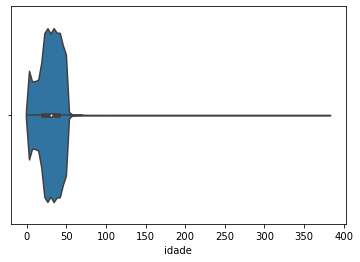

In [6]:
# selecionando apenas a coluna idade
df_idade = df.select('idade').toPandas()
df_idade['idade'] = df_idade['idade'].astype(str).str.replace(',', '.').str.replace('None', 'nan').astype(float)
sns.violinplot(x=df_idade["idade"], df=df_idade)

Inconsistências são outliers

In [7]:
# contabilizando como inconsistente idade maior que 100
centenarios = df_idade[df_idade['idade']>100].count()
idades_validas = df_idade[df_idade['idade']<=100].count()
consistencia_idades = (idades_validas/(centenarios+idades_validas))*100
print("Percentual de consistência para idades: ", consistencia_idades)

Percentual de consistência para idades:  idade    99.999661
dtype: float64


### Atributos sintomas e condicoes, que contém os termos separados por vírgula

In [19]:
df_sintomas = df.select('sintomas').toPandas()

print("Foram encontradas ", df_sintomas.count() , " ocorrências únicas para o atributo sintomas")

df_sintomas.dropna(subset = ['sintomas'], inplace=True)
df_sintomas.reset_index(inplace=True)
df_sintomas.drop('index', axis=1, inplace=True)
df_sintomas
#print("Nulos: ", df_sintomas['sintomas'].isnull().sum())

vectorizer = CountVectorizer(strip_accents='ascii',token_pattern='(?u)[a-zA-Z][a-z ]+')

cv = vectorizer.fit_transform(df_sintomas['sintomas'])

#print(vectorizer.get_feature_names())

df_sintomas = pd.DataFrame(cv.toarray(), columns=vectorizer.get_feature_names())
#AppKit.NSBeep()
df_sintomas.sum()


Foram encontradas  sintomas    15571882
dtype: int64  ocorrências únicas para o atributo sintomas


assintomatico            2648329
belgica                        3
belgium nv                     3
coriza                   6165426
dispineia                      1
dispneia                 1203891
disturbios gustativos     566321
disturbios olfativos      490811
dor de cabeca            5762046
dor de garganta          5851884
febre                    4535253
outros                   3305860
tosse                    8308716
dtype: int64

In [9]:
df_condicoes = df.select('condicoes').toPandas()

print("Foram encontradas ", df_condicoes.count(), "ocorrências únicas no atributo condicoes")

df_condicoes.dropna(subset = ['condicoes'], inplace=True)
df_condicoes.reset_index(inplace=True)
df_condicoes.drop('index', axis=1, inplace=True)
#print("Nulos: ", df_condicoes['condicoes'].isnull().sum())
df_condicoes['condicoes'] = df_condicoes['condicoes'].str.lower().str.replace("puérpera \(até 45 dias do parto\)",
                                                                              "puépera", regex=True)


vectorizer = CountVectorizer(strip_accents='ascii',token_pattern='(?u)[a-zA-Z][a-z ]+')
cv = vectorizer.fit_transform(df_condicoes['condicoes'])

#print(vectorizer.get_feature_names())

df_condicoes_col = pd.DataFrame(cv.toarray(), columns=vectorizer.get_feature_names())

#AppKit.NSBeep()

df_condicoes_col.sum()

Foram encontradas  condicoes    1580751
dtype: int64 ocorrências únicas no atributo condicoes


diabetes                                                                  318740
doencas cardiacas cronicas                                                472514
doencas renais cronicas                                                        3
doencas renais cronicas em estagio avancado                                21273
doencas respiratorias cronicas descompensadas                             371095
false                                                                          3
gestante                                                                   81061
gestante de alto risco                                                        45
graus                                                                      21273
imunossupressao                                                            55487
imunosupressao                                                               148
obesidade                                                                  54591
ou                          

Gestante de Alto Risco não está listado no dicionário

In [11]:
gestante_altorisco = df.filter(sql_fun.lower(df.condicoes).contains("gestante de alto risco"))
gestante_altorisco.show()

23/03/10 18:56:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+-------+--------------------+---------------+---------------------+--------------------+--------------------+--------+---------+----------+-------------------+-------------+-----------+-----------------+--------------------+------------------------+------------+--------------------+---------------------+-----------------------------+----------------------------+--------------------------------+-------------------------------+-----------------------------+----------------------------+-------------------+-----------------------------+----------------------------+----------------+---------------+---------------------------------+----------+--------+--------+-----------------+---------------------+---------------------+---------------+------------------+----------------+----------------+---------------+------------------+----------------+----------------------+---------------------+------------------+----------------+----------------------+----------

In [12]:
print("Foram encontradas ", gestante_altorisco.count(), "ocorrências de Gestante de Alto Risco no atributo condicoes")
print("Representatividade: ", (gestante_altorisco.count()/df.filter("condicoes is not null").count())*100, "%")

Foram encontradas  45 ocorrências de Gestante de Alto Risco no atributo condicoes


Representatividade:  0.002846748159577315 %


# Outras Validações

## Busca de Inconsistências na comparação entre atributos

### Existem grávidas no puerpério?

In [3]:
gestantes = df.filter(sql_fun.lower(df.condicoes).contains("gestante"))
total_gestantes = gestantes.count()

In [26]:
# Não foram encontrados registros considerando a variação de grafia: puerpera, puerpéria, puerpério
print(gestantes.filter(sql_fun.lower(df.condicoes).contains("puerpera")).count())
print(gestantes.filter(sql_fun.lower(df.condicoes).contains("puerpéria")).count())
print(gestantes.filter(sql_fun.lower(df.condicoes).contains("puerpério")).count())

0


0


0


In [28]:
gestantes_puerperas = gestantes.filter(sql_fun.lower(df.condicoes).contains("puérpera"))
total_gestantes_puerperas = gestantes_puerperas.count()

In [31]:
print("Total de Gestantes: ", total_gestantes)
print("Total de Gestantes Puérperas: ", total_gestantes_puerperas)
print("Percentual de Gestantes Puérperas: ", (total_gestantes_puerperas/total_gestantes)*100, "%")

Total de Gestantes:  81106
Total de Gestantes Puérperas:  140
Percentual de Gestantes Puérperas:  0.17261361674845263 %


### Existem grávidas com sexo masculino?

In [32]:
total_gestantes_masculino = gestantes.filter(df.sexo == 'Masculino').count()

In [33]:
print("Total de Gestantes do Sexo Masculino: ", total_gestantes_masculino)
print("Percentual de Gestantes do Sexo Masculino: ", (total_gestantes_masculino/total_gestantes)*100, "%")

Total de Gestantes do Sexo Masculino:  796
Percentual de Gestantes do Sexo Masculino:  0.981431706655488 %


### Existem registros de puerpério para sexo masculino?

In [34]:
puerperio = df.filter(sql_fun.lower(df.condicoes).contains("puérpera"))

In [35]:
total_puerperas = puerperio.count()

In [36]:
puerperio.groupBy('sexo').count().show()

+---------+-----+
|     sexo|count|
+---------+-----+
| Feminino| 2394|
|Masculino|  195|
+---------+-----+



In [37]:
total_puerpera_masculino = puerperio.filter(df.sexo == 'Masculino').count()

In [39]:
print("Total de Puérperas: ", total_puerperas)
print("Total de Puérperas do Sexo Masculino: ", total_puerpera_masculino)
print("Percentual de Puérperas do Sexo Masculino: ", (total_puerpera_masculino/total_puerperas)*100, "%")

Total de Puérperas:  2589
Total de Puérperas do Sexo Masculino:  195
Percentual de Puérperas do Sexo Masculino:  7.531865585168019 %


### Existem grávidas com sexo indefinido ou outro?

In [4]:
print("Gestantes com sexo 'indefinido': ", gestantes.filter(df.sexo == 'Indefinido').count())
print("Gestantes com sexo 'outro': ", gestantes.filter(df.sexo == 'Outro').count())

Gestantes com sexo 'indefinido':  19


Gestantes com sexo 'outro':  0


### Análise da Faixa de idade das grávidas

In [47]:
gestantes.groupBy('idade').count().sort(col("idade").desc()).show()

+-----+-----+
|idade|count|
+-----+-----+
|   58|    1|
|   56|    1|
|   54|    1|
|   53|    1|
|   52|   29|
|   51|   19|
|   50|   41|
|   49|   39|
|   48|   47|
|   47|   68|
|   46|  108|
|   45|  215|
|   44|  334|
|   43|  468|
|   42|  721|
|   41| 1090|
|   40| 1538|
|   39| 1729|
|   38| 2003|
|   37| 2430|
+-----+-----+
only showing top 20 rows



In [46]:
gestantes.groupBy('idade').count().sort(col("idade").asc()).show()

+-----+-----+
|idade|count|
+-----+-----+
| null| 2001|
|    0|  246|
|    1|   61|
|    2|   22|
|    3|   11|
|    4|    7|
|    5|    9|
|    6|    3|
|    7|    5|
|    8|    9|
|    9|    9|
|   10|   11|
|   11|    8|
|   12|    9|
|   13|   33|
|   14|   85|
|   15|  254|
|   16|  540|
|   17|  879|
|   18| 1380|
+-----+-----+
only showing top 20 rows



In [ ]:
Grávidas com idade entre 3 e 8 anos

In [41]:
gestantes.filter(df.idade < 9).filter(df.idade > 3).count()

33

In [40]:
gestantes.filter(df.idade <= 3).count()

340

In [43]:
gestantes_menor9 = gestantes.filter(df.idade < 9).count()

In [45]:
print("Total de Gestantes com idade menor que 9 anos: ", gestantes_menor9)
print("Percentual de Gestantes com idade menor que 9 anos: ", (gestantes_menor9 /total_gestantes)*100, "%")

Total de Gestantes com idade menor que 9 anos:  373
Percentual de Gestantes com idade menor que 9 anos:  0.4598919931940917 %


### Existe registro de puerpério para idades incompatíveis?

In [13]:
puerperio.groupBy('idade').count().sort(col("idade").asc()).show()

+-----+-----+
|idade|count|
+-----+-----+
| null|  194|
|    0|   22|
|    1|    9|
|    2|    1|
|    3|    4|
|    4|    3|
|    5|    5|
|    6|    3|
|    7|    4|
|    8|    1|
|    9|    2|
|   10|    1|
|   11|    5|
|   12|    5|
|   13|    4|
|   14|    4|
|   15|   19|
|   16|   21|
|   17|   33|
|   18|   39|
+-----+-----+
only showing top 20 rows



In [14]:
puerperio.groupBy('idade').count().sort(col("idade").desc()).show()

+-----+-----+
|idade|count|
+-----+-----+
|   59|    1|
|   52|    5|
|   51|    6|
|   50|    4|
|   49|    8|
|   48|    6|
|   47|    9|
|   46|    6|
|   45|   10|
|   44|   16|
|   43|   21|
|   42|   31|
|   41|   54|
|   40|   59|
|   39|   57|
|   38|   69|
|   37|   79|
|   36|   84|
|   35|  118|
|   34|   87|
+-----+-----+
only showing top 20 rows



In [46]:
puerperio_menor9 = puerperio.filter(df.idade < 9).count()

In [47]:
print("Total de Puérperas com idade menor que 9 anos: ", puerperio_menor9)
print("Percentual de Gestantes com idade menor que 9 anos: ", (puerperio_menor9 /total_puerperas)*100, "%")

Total de Puérperas com idade menor que 9 anos:  52
Percentual de Gestantes com idade menor que 9 anos:  2.008497489378138 %


### Validação de datas

In [19]:
df.groupBy(to_date(col("dataNotificacao"),"yyyy-MM-dd")).count().sort(to_date(col("dataNotificacao"),"yyyy-MM-dd").desc()).show()

+------------------------------------+-----+
|to_date(dataNotificacao, yyyy-MM-dd)|count|
+------------------------------------+-----+
|                          2023-02-06|    8|
|                          2023-02-05|    1|
|                          2023-02-04|    4|
|                          2023-02-03|    5|
|                          2023-02-02|    5|
|                          2023-02-01|   12|
|                          2023-01-31|   19|
|                          2023-01-30|   20|
|                          2023-01-29|    3|
|                          2023-01-28|   10|
|                          2023-01-27|   18|
|                          2023-01-26|   19|
|                          2023-01-25|   19|
|                          2023-01-24|   24|
|                          2023-01-23|   20|
|                          2023-01-22|    4|
|                          2023-01-21|    1|
|                          2023-01-20|   13|
|                          2023-01-19|   25|
|         

### A data de início dos sintomas é posterior à data de notificação?

In [40]:
print("Percentual inconsistente: ", (df.filter(to_date(col("dataNotificacao"),"yyyy-MM-dd") < to_date(col("dataInicioSintomas"),"yyyy-MM-dd")).count()/
                                     df.filter("dataNotificacao is not null").filter("dataInicioSintomas is not null").count())*100 ,"%")


Percentual inconsistente:  0.011860827731655548 %


### A data de encerramento é anterior à data de notificação?

In [26]:
df.filter(to_date(col("dataEncerramento"),"yyyy-MM-dd") < to_date(col("dataNotificacao"),"yyyy-MM-dd")).count()

129737

In [27]:
encerramento_incorreto = df.filter(to_date(col("dataEncerramento"),"yyyy-MM-dd") < to_date(col("dataNotificacao"),"yyyy-MM-dd")).show()

+--------------------+-----------------+--------+--------------------+----------------+---------------------+----+--------------------+---------+------------+----------+--------------------+-------------+-----------+-----------------+--------------------+------------------------+--------------------+--------------------+---------------------+-----------------------------+----------------------------+--------------------------------+-------------------------------+-----------------------------+----------------------------+-------------------+-----------------------------+----------------------------+----------------+---------------+---------------------------------+----------+--------+--------+-----------------+---------------------+---------------------+---------------+------------------+----------------+----------------+---------------+------------------+----------------+----------------------+---------------------+------------------+----------------+----------------------+-----------

In [43]:
print("Percentual inconsistente: ", (df.filter(to_date(col("dataEncerramento"),"yyyy-MM-dd") < to_date(col("dataNotificacao"),"yyyy-MM-dd")).count()/
                                    df.filter("dataEncerramento is not null").filter("dataNotificacao is not null").count())*100 ,"%")

Percentual inconsistente:  0.8331284284904147 %


### Data da segunda dose é anterior à data da primeira dose?

In [44]:
print("Percentual inconsistente: ",
      (df.filter(to_date(col("dataSegundaDose"),"yyyy-MM-dd") < to_date(col("dataPrimeiraDose"),"yyyy-MM-dd")).count()/
       df.filter("dataSegundaDose is not null").filter("dataPrimeiraDose is not null").count())*100 ,"%")

Percentual inconsistente:  0.016169769479322506 %


## Completude

In [5]:
#Vizualizando colunas do dataset

df.printSchema()

root
 |-- sintomas: string (nullable = true)
 |-- profissionalSaude: string (nullable = true)
 |-- racaCor: string (nullable = true)
 |-- outrosSintomas: string (nullable = true)
 |-- outrasCondicoes: string (nullable = true)
 |-- profissionalSeguranca: string (nullable = true)
 |-- cbo: string (nullable = true)
 |-- condicoes: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- estado: string (nullable = true)
 |-- estadoIBGE: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- municipioIBGE: string (nullable = true)
 |-- origem: string (nullable = true)
 |-- estadoNotificacao: string (nullable = true)
 |-- municipioNotificacao: string (nullable = true)
 |-- municipioNotificacaoIBGE: integer (nullable = true)
 |-- evolucaoCaso: string (nullable = true)
 |-- classificacaoFinal: string (nullable = true)
 |-- codigoEstrategiaCovid: integer (nullable = true)
 |-- codigoBuscaAtivaAssintomatico: integer (nullable = true)
 |-- outroBuscaAtivaAssintomatico: st

## Colunas de preenchimento obrigatório

In [30]:
#Filtrando colunas obrigatórias

df_obr = df.select('estadoNotificacao', \
                   'municipioNotificacao', \
                   'profissionalSaude', \
                   'sexo', \
                   'racaCor', \
                   'codigoContemComunidadeTradicional', \
                   'estado', \
                   'municipio', 
                   'codigoLocalRealizacaoTestagem', 
                   'dataNotificacao', 
                   'sintomas', 
                   'dataInicioSintomas')

In [31]:
#Verificando colunas filtradas

df_obr.printSchema()

root
 |-- estadoNotificacao: string (nullable = true)
 |-- municipioNotificacao: string (nullable = true)
 |-- profissionalSaude: string (nullable = true)
 |-- sexo: string (nullable = true)
 |-- racaCor: string (nullable = true)
 |-- codigoContemComunidadeTradicional: integer (nullable = true)
 |-- estado: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- codigoLocalRealizacaoTestagem: integer (nullable = true)
 |-- dataNotificacao: string (nullable = true)
 |-- sintomas: string (nullable = true)
 |-- dataInicioSintomas: string (nullable = true)



### Funções para contar valores

In [133]:
#Função para contar únicos

def Unicos (coluna):
    df.groupby(coluna).count().orderBy(col('count').desc()).show()
    
    
    
#Função para encontrar preenchimentos que indiquem dados faltantes

def Faltantes (coluna):
    df.groupBy(coluna).agg(count(coluna).alias("QuantidadeOcorrencia")).\
    filter((col(coluna)=='Ignorado')\
           |(col(coluna)=='Ignorados')\
           |(col(coluna)=='Indefinido')\
           |(col(coluna)=='Indefinidos')\
           |(col(coluna)=='Não informados')\
           |(col(coluna)=='Não informado')\
           |(col(coluna)=='Pedente identificação')\
           |(col(coluna)=='Pendente Identifica??o')).show()

### Analisando colunas obrigatórias

### Sintomas

In [70]:
Unicos('Sintomas')

+--------------------+-------+
|            Sintomas|  count|
+--------------------+-------+
|       Assintomático|2641168|
|               Tosse| 487972|
|       Coriza, Tosse| 460325|
|              Outros| 422597|
|Tosse, Dor de Gar...| 314147|
|Coriza, Tosse, Do...| 308026|
|     Dor de Garganta| 303960|
|Coriza, Dor de Ca...| 260236|
|       Tosse, Coriza| 230105|
|              Coriza| 227217|
|Coriza, Dor de Ca...| 221764|
|Coriza, Tosse, Febre| 212324|
|        Tosse, Febre| 209788|
|       Dor de Cabeça| 203716|
|       Tosse, Outros| 178585|
|Dor de Garganta, ...| 164249|
|Coriza, Dor de Ca...| 156462|
|Dor de Cabeça, Do...| 156190|
|Dor de Cabeça, Tosse| 155446|
|Coriza, Tosse, Do...| 148767|
+--------------------+-------+
only showing top 20 rows



In [134]:
Faltantes('Sintomas')

+--------+--------------------+
|Sintomas|QuantidadeOcorrencia|
+--------+--------------------+
+--------+--------------------+



### profissionalSaude

In [27]:
Unicos('profissionalSaude')

+-----------------+--------+
|profissionalSaude|   count|
+-----------------+--------+
|              Não|15326625|
|              Sim|  246790|
|             null|     477|
+-----------------+--------+



In [135]:
Faltantes('profissionalSaude')

+-----------------+--------------------+
|profissionalSaude|QuantidadeOcorrencia|
+-----------------+--------------------+
+-----------------+--------------------+



### racaCor

In [73]:
Unicos('racaCor')

+--------+-------+
| racaCor|  count|
+--------+-------+
|  Branca|7237898|
|Ignorado|4549312|
|   Parda|3023935|
|   Preta| 491797|
| Amarela| 258597|
|    null|   9424|
|Indigena|   2564|
|  Branco|    362|
|  FD7219|      3|
+--------+-------+



In [136]:
Faltantes('racaCor')

+--------+--------------------+
| racaCor|QuantidadeOcorrencia|
+--------+--------------------+
|Ignorado|             4549312|
+--------+--------------------+



### sexo

In [75]:
Unicos('Sexo')

+----------+-------+
|      Sexo|  count|
+----------+-------+
|  Feminino|9004852|
| Masculino|6566818|
|Indefinido|   2201|
|     Outro|     12|
|      null|      9|
+----------+-------+



In [137]:
Faltantes('sexo')

+----------+--------------------+
|      sexo|QuantidadeOcorrencia|
+----------+--------------------+
|Indefinido|                2201|
+----------+--------------------+



### estado

In [77]:
Unicos('estado')

+-------------------+--------+
|             estado|   count|
+-------------------+--------+
|          São Paulo|15372661|
|       Minas Gerais|   39394|
|     Rio de Janeiro|   25090|
|              Bahia|   20402|
|             Paraná|   17569|
|     Santa Catarina|   10744|
|         Pernambuco|   10459|
|   Distrito Federal|    9027|
|              Ceará|    8369|
|  Rio Grande do Sul|    7799|
|              Goiás|    6992|
|            Paraíba|    5610|
| Mato Grosso do Sul|    5478|
|        Mato Grosso|    4101|
|Rio Grande do Norte|    3880|
|              Piauí|    3592|
|     Espírito Santo|    3590|
|               Pará|    3501|
|           Maranhão|    3438|
|            Alagoas|    3367|
+-------------------+--------+
only showing top 20 rows



In [138]:
Faltantes('estado')

+------+--------------------+
|estado|QuantidadeOcorrencia|
+------+--------------------+
+------+--------------------+



### municipio

In [79]:
Unicos('municipio')

+--------------------+-------+
|           municipio|  count|
+--------------------+-------+
|           São Paulo|3742578|
|            Campinas| 582829|
| São José dos Campos| 419220|
|São Bernardo do C...| 326805|
|São José do Rio P...| 268430|
|          Araraquara| 251242|
|           Guarulhos| 189955|
|          Piracicaba| 182508|
|         Santo André| 181531|
|            Sorocaba| 179967|
|            Botucatu| 179437|
|      Ribeirão Preto| 176970|
|              Franca| 167399|
|               Bauru| 158040|
|             Taubaté| 154746|
|             Jundiaí| 148679|
|              Santos| 131841|
|           Araçatuba| 128741|
|             Barueri| 127938|
|             Marília| 119266|
+--------------------+-------+
only showing top 20 rows



In [139]:
Faltantes('municipio')

+---------+--------------------+
|municipio|QuantidadeOcorrencia|
+---------+--------------------+
+---------+--------------------+



### estadoNotificacao

In [81]:
Unicos('estadoNotificacao')

+-----------------+--------+
|estadoNotificacao|   count|
+-----------------+--------+
|        São Paulo|15573863|
|            Bahia|      26|
|             None|       3|
+-----------------+--------+



In [140]:
Faltantes('estadoNotificacao')

+-----------------+--------------------+
|estadoNotificacao|QuantidadeOcorrencia|
+-----------------+--------------------+
+-----------------+--------------------+



### municipioNotificacao

In [83]:
Unicos('municipioNotificacao')

+--------------------+-------+
|municipioNotificacao|  count|
+--------------------+-------+
|           São Paulo|3959414|
|            Campinas| 628352|
| São José dos Campos| 441346|
|São José do Rio P...| 319137|
|São Bernardo do C...| 302603|
|          Araraquara| 259982|
|          Piracicaba| 190611|
|      Ribeirão Preto| 189816|
|            Sorocaba| 186597|
|            Botucatu| 183931|
|              Santos| 179905|
|             Jundiaí| 179581|
|         Santo André| 178412|
|              Franca| 170685|
|               Bauru| 164543|
|           Guarulhos| 164442|
|             Taubaté| 153330|
|             Barueri| 148707|
|           Araçatuba| 138115|
|           Americana| 128482|
+--------------------+-------+
only showing top 20 rows



In [141]:
Faltantes('municipioNotificacao')

+--------------------+--------------------+
|municipioNotificacao|QuantidadeOcorrencia|
+--------------------+--------------------+
+--------------------+--------------------+



### codigoContemComunidadeTradicional

In [28]:
Unicos('codigoContemComunidadeTradicional')

+---------------------------------+--------+
|codigoContemComunidadeTradicional|   count|
+---------------------------------+--------+
|                                2|15247265|
|                             null|  286460|
|                                1|   40167|
+---------------------------------+--------+



In [142]:
Faltantes('codigoContemComunidadeTradicional')

+---------------------------------+--------------------+
|codigoContemComunidadeTradicional|QuantidadeOcorrencia|
+---------------------------------+--------------------+
+---------------------------------+--------------------+



### codigoLocalRealizacaoTestagem

In [90]:
Unicos('codigoLocalRealizacaoTestagem')

+-----------------------------+--------+
|codigoLocalRealizacaoTestagem|   count|
+-----------------------------+--------+
|                            1|12359605|
|                            4| 1726514|
|                         null|  745797|
|                            7|  445254|
|                            2|  131416|
|                            3|  128241|
|                            6|   26458|
|                            5|   10607|
+-----------------------------+--------+



In [143]:
Faltantes('codigoLocalRealizacaoTestagem')

+-----------------------------+--------------------+
|codigoLocalRealizacaoTestagem|QuantidadeOcorrencia|
+-----------------------------+--------------------+
+-----------------------------+--------------------+



### dataNotificacao

In [86]:
Unicos('dataNotificacao')

+---------------+------+
|dataNotificacao| count|
+---------------+------+
|           None|259712|
|     2022-01-13|167889|
|     2022-01-17|167044|
|     2022-01-18|157531|
|     2022-01-12|152407|
|     2022-01-11|149793|
|     2022-01-10|148696|
|     2022-01-19|145709|
|     2022-01-24|134834|
|     2022-01-21|131786|
|     2022-01-20|130269|
|     2022-01-07|127014|
|     2022-01-06|126773|
|     2022-01-26|119040|
|     2022-01-27|115765|
|     2022-01-25|113763|
|     2022-01-05|110555|
|     2022-01-28|104856|
|     2022-01-31|104113|
|     2022-01-04| 98865|
+---------------+------+
only showing top 20 rows



In [144]:
Faltantes('dataNotificacao')

+---------------+--------------------+
|dataNotificacao|QuantidadeOcorrencia|
+---------------+--------------------+
+---------------+--------------------+



### dataInicioSintomas

In [88]:
Unicos('dataInicioSintomas')

+------------------+-------+
|dataInicioSintomas|  count|
+------------------+-------+
|              None|2751789|
|        2022-01-10| 170083|
|        2022-01-09| 131214|
|        2022-01-03| 130895|
|        2022-01-17| 126412|
|        2022-01-15| 122208|
|        2022-01-11| 120785|
|        2022-01-14| 119538|
|        2022-01-08| 116834|
|        2022-01-07| 116820|
|        2022-01-16| 111339|
|        2022-01-02| 111283|
|        2022-01-12| 110501|
|        2022-01-18| 106127|
|        2022-01-04| 104852|
|        2022-01-13| 104474|
|        2022-01-05| 103195|
|        2022-01-01| 102471|
|        2022-01-06|  96779|
|        2022-06-20|  92134|
+------------------+-------+
only showing top 20 rows



In [145]:
Faltantes('dataInicioSintomas')

+------------------+--------------------+
|dataInicioSintomas|QuantidadeOcorrencia|
+------------------+--------------------+
+------------------+--------------------+



## Quantidade de dados nulos por coluna obrigatória

In [33]:
nulos = df_obr.select([count(when(col(c).isNull(), c)).alias(c) for c in df_obr.columns]).show(vertical = True)

-RECORD 0-----------------------------------
 estadoNotificacao                 | 0      
 municipioNotificacao              | 3584   
 profissionalSaude                 | 477    
 sexo                              | 9      
 racaCor                           | 9424   
 codigoContemComunidadeTradicional | 286460 
 estado                            | 20     
 municipio                         | 24     
 codigoLocalRealizacaoTestagem     | 745797 
 dataNotificacao                   | 6      
 sintomas                          | 393    
 dataInicioSintomas                | 6      



## Percentual de nulos por coluna obrigatória

In [34]:
percentualNulos = df_obr.select([(count(when(col(c).isNull(), c))/count(lit(1)) * 100).alias(c) for c in df_obr.columns])
percentualNulos.show(vertical = True, truncate = True)

-RECORD 0-------------------------------------------------
 estadoNotificacao                 | 0.0                  
 municipioNotificacao              | 0.023012873082720747 
 profissionalSaude                 | 0.003062818208833091 
 sexo                              | 5.778902280817152E-5 
 racaCor                           | 0.060511527882689826 
 codigoContemComunidadeTradicional | 1.8393603859587573   
 estado                            | 1.284200506848256E-4 
 municipio                         | 1.541040608217907... 
 codigoLocalRealizacaoTestagem     | 4.788764427029544    
 dataNotificacao                   | 3.852601520544768E-5 
 sintomas                          | 0.002523453995956... 
 dataInicioSintomas                | 3.852601520544768E-5 



In [35]:
#Arredondando casas decimeias

percentualNulos.select([round(avg(c), 2).alias(c) for c in percentualNulos.columns]).show(vertical = True, truncate = True)

-RECORD 0---------------------------------
 estadoNotificacao                 | 0.0  
 municipioNotificacao              | 0.02 
 profissionalSaude                 | 0.0  
 sexo                              | 0.0  
 racaCor                           | 0.06 
 codigoContemComunidadeTradicional | 1.84 
 estado                            | 0.0  
 municipio                         | 0.0  
 codigoLocalRealizacaoTestagem     | 4.79 
 dataNotificacao                   | 0.0  
 sintomas                          | 0.0  
 dataInicioSintomas                | 0.0  



### Criando função para gerar nova tabela com quantidade total e o percentual de nulos

In [298]:
def Null(df_obr: DataFrame) -> DataFrame: 
  
  # Colocando todas as colunas em uma lista
  allColsList = df_obr.columns
  
  # criando uma lista vazia para armazenar temporariamente nomes de colunas e valores 
  listBuffer = []
  
  for field in allColsList:   
    # countando nulos
    nullCondition = F.isnull(F.col(field))
    QuantidadeNulos = df_obr.select(F.col(field)).filter(nullCondition).count()  
    
    # percentual de nulos
    PercentualNulos = df_obr.select(F.col(field)).filter(nullCondition).count() / df_obr.select(F.col(field)).count() * 100
    
    
    # agrupando colunas e valores
    listBuffer.append((field, QuantidadeNulos, PercentualNulos))

  # convertendo os dados em um novo dataframe
  resDf = spark.createDataFrame(listBuffer, ["NomeColuna", "QuantidadeNulos", "PercentualNulos"])
 
  return resDf

In [299]:
df_obr_null = df_obr.transform(Null)

In [38]:
#Arredondando percentual nulos

df_obr_null.select('NomeColuna', 'QuantidadeNulos', round("PercentualNulos",2).alias('PercentualNulos')).show()

+--------------------+---------------+---------------+
|          NomeColuna|QuantidadeNulos|PercentualNulos|
+--------------------+---------------+---------------+
|   estadoNotificacao|              0|            0.0|
|municipioNotificacao|           3584|           0.02|
|   profissionalSaude|            477|            0.0|
|                sexo|              9|            0.0|
|             racaCor|           9424|           0.06|
|codigoContemComun...|         286460|           1.84|
|              estado|             20|            0.0|
|           municipio|             24|            0.0|
|codigoLocalRealiz...|         745797|           4.79|
|     dataNotificacao|              6|            0.0|
|            sintomas|            393|            0.0|
|  dataInicioSintomas|              6|            0.0|
+--------------------+---------------+---------------+



In [271]:
df_obrigatorio = df_obr_null.select('NomeColuna', 'QuantidadeNulos', round("PercentualNulos",2).alias('PercentualNulos')).toPandas()

In [307]:
#Calculando percentual de nulos

df_obrigatorio['% Valores Completos'] = (100 - df_obrigatorio['PercentualNulos']).round(decimals = 2)

df_obrigatorio.rename(columns = {'NomeColuna':'Coluna', 'QuantidadeNulos':'Quantidade de Nulos'}, inplace = True)

df_obrigatorio.drop('PercentualNulos', axis=1)

,Coluna,Quantidade de Nulos,% Valores Completos
0,estadoNotificacao,0,100.00
1,municipioNotificacao,3584,99.98
2,profissionalSaude,477,100.00
3,sexo,9,100.00
4,racaCor,9424,99.94
5,codigoContemComunidadeTradicional,286460,98.16
6,estado,20,100.00
7,municipio,24,100.00
8,codigoLocalRealizacaoTestagem,745797,95.21
9,dataNotificacao,6,100.00


## Analisando dados nulos das colunas obrigatórias por data

In [39]:
# adicionando coluna com nome do mês e ano para agrupamento e coluna com número do ano e mês para ordenação

date = df_obr.withColumn('mesAno', F.date_format('dataNotificacao', 'MMM/yyy'))\
    .withColumn('Ref', F.date_format('dataNotificacao', 'yyyMM'))

In [40]:
#Criando uma lista com o nome de cada mês
lista = date.select('mesAno').distinct().rdd.flatMap(lambda x: x).collect()

In [41]:
#Criando datasets vazios para armazenar a soma dos nulos
columns1 = StructType([StructField('totalNulos',StringType(), True),StructField('mesAno',StringType(), True)])
uniao1 = spark.createDataFrame(data = [],schema = columns1)
columns2 = StructType([StructField('totalNaoNulos',StringType(), True),StructField('mesAno',StringType(), True)])
uniao2 = spark.createDataFrame(data = [],schema = columns2)


#Criando o loop for para fazer a contagem de nulos e não nulos para cada mês
for mes in lista:
    
    #Contando valores nulos por coluna
    nulosMes = date.filter(date.mesAno == mes )\
        .select([count(when(col(c).isNull(), c)).alias(c) for c in date.columns])\
        .drop('mesAno', 'Ref')

    #Calculando a quantidade total de nulos
    totalnulosMes = nulosMes.withColumn('totalNulos', sum(nulosMes[col] for col in nulosMes.columns))\
        .select('totalNulos')\
        .withColumn('mesAno', lit(mes))
    
    #Fazendo a união da quantidade de nulos por mês em um único dataset
    uniao1 = uniao1.union(totalnulosMes)
    
    
    #Contando valores não nulos por coluna
    naonulosMes = date.filter(date.mesAno == mes )\
        .select([count(when(col(c).isNotNull(), c)).alias(c) for c in date.columns])\
        .drop('mesAno', 'Ref')
    
    #Calculando a quantidade total de nao nulos
    totalnaonulosMes = naonulosMes\
        .withColumn('totalNaoNulos', sum(naonulosMes[col] for col in naonulosMes.columns))\
        .select("totalNaoNulos")\
        .withColumn('mesAno', lit(mes))
    
    #Fazendo a união da quantidade de não nulos por mês em um único dataset
    uniao2 = uniao2.union(totalnaonulosMes)

In [42]:
# Criando dataset com a informação de referência para ordenar os dados por mes/ano

uniao3 = date.groupby('mesAno', 'Ref').count()

In [43]:
#Agrupando a quantidade de nulos, quantidade de não-nulos e referência do mês em um único dataset

agrupar = uniao1.join(uniao2, ['mesAno']).join(uniao3, ['mesAno']).orderBy(col('Ref').asc()).drop('cont')

In [44]:
#Criando nova coluna com o o total de dados e outra coluna com o cálculo do percentual de nulos

agruparPercent = agrupar\
    .select('*',(agrupar["totalNulos"] + agrupar["totalnaoNulos"]).alias("totalDados"))\
    .select('*',(agrupar["totalNulos"] / (agrupar["totalNulos"] + agrupar["totalnaoNulos"]) * 100).alias("percentualNulos"))

## Plotando

In [45]:
#Para facilitar a criação de graficos a tabela de informações do Pyspark foi transformada para a biblioteca pandas

#Nesse mesmo momento foi utilizada a função round para transformar os dados das colunas em float e 
#arredondar as casas decimais

plotar = agruparPercent.select(\
        'mesAno', round('totalDados',0).alias('totalDados'), \
        round('totalNulos',0).alias('totalNulos'), \
        round('totalnaoNulos',0).alias('totalnaoNulos'), \
        round("percentualNulos",2).alias('percentualNulos'))\
        .toPandas()

In [47]:
plotar.dtypes

mesAno              object
totalDados         float64
totalNulos         float64
totalnaoNulos      float64
percentualNulos    float64
dtype: object

In [247]:
plotar.iloc[40:77,:].

,mesAno,totalDados,totalNulos,totalnaoNulos,percentualNulos
40,Jan/2020,33516.0,34.0,33482.0,0.10
41,Feb/2020,1380.0,32.0,1348.0,2.32
42,Mar/2020,6948.0,725.0,6223.0,10.43
43,Apr/2020,60912.0,8207.0,52705.0,13.47
44,May/2020,143580.0,23029.0,120551.0,16.04
45,Jun/2020,229872.0,36908.0,192964.0,16.06
46,Jul/2020,312516.0,42211.0,270305.0,13.51
47,Aug/2020,291432.0,41907.0,249525.0,14.38
48,Sep/2020,234936.0,33704.0,201232.0,14.35
49,Oct/2020,247092.0,36122.0,210970.0,14.62


In [48]:
import plotly
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Criando figura com eixo y secundário y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adicionando traces
fig.add_trace(
    go.Scatter(x = plotar['mesAno'], y = plotar['totalDados'], name="Quantidade de Dados"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = plotar['mesAno'], y = plotar['percentualNulos'], name="Percentual Nulos"),
    secondary_y=True,
)

# Adicionando título da figura
fig.update_layout(
    title_text="Quantidade de dados x percentual nulos"
)

# Ajustando a escala do eixo secundário

fig.update_layout(yaxis2_range=[-2.4,100])
fig.update_layout(yaxis_range=[-1000000,40000000])

# Colocando título do eixo x
fig.update_xaxes(title_text="Mes/Ano")

# Colocando título dos eixos y
fig.update_yaxes(title_text="Quantidade", secondary_y=False)
fig.update_yaxes(title_text="Percentual", secondary_y=True)


fig.show()

## Colunas de preenchimento obrigatório condicional

In [146]:
#Criando novo dataset para receber as informações de cada coluna

colunas = StructType([StructField('Coluna',StringType(), True)\
                      ,StructField('QuantidadeNulos',StringType(), True)
                      ,StructField('QuantidadeNaoNulos',StringType(), True)])
tabela = spark.createDataFrame(data = [],schema = colunas)

In [147]:
tabela.show()

+------+---------------+------------------+
|Coluna|QuantidadeNulos|QuantidadeNaoNulos|
+------+---------------+------------------+
+------+---------------+------------------+



### Criando funções para avaliar cada coluna

In [219]:
# Criando funções para calcular a quantidade de nulos e não nulos de cada coluna

#Função para calcular valores nulos considerando todos os valores preenchidos da coluna condicional
def cont_null_cond(colunaFiltro, colunaVerificacao):
    filtro = df.filter((col(colunaFiltro).isNotNull()))
    
    linha = filtro\
        .select([count(when(col(colunaVerificacao).isNull(), colunaVerificacao)).alias('QuantidadeNulos')])\
        .withColumn('QuantidadeNaoNulos', lit(filtro.select(col(colunaVerificacao)).filter(col(colunaVerificacao).isNotNull()).count()))\
        .withColumn('NomeColuna', lit(colunaVerificacao))\
        .select(['NomeColuna', 'QuantidadeNulos', 'QuantidadeNaoNulos'])
    
    return linha


#Função para calcular valores nulos com apenas uma condição de filtro

def cont_null_1cond(colunaFiltro, condicao, colunaVerificacao):
    filtro1 = df.filter((col(colunaFiltro)==condicao))
    
    linha1 = filtro1\
        .select([count(when(col(colunaVerificacao).isNull(), colunaVerificacao)).alias('QuantidadeNulos')])\
        .withColumn('QuantidadeNaoNulos', lit(filtro1.select(col(colunaVerificacao)).filter(col(colunaVerificacao).isNotNull()).count()))\
        .withColumn('NomeColuna', lit(colunaVerificacao))\
        .select(['NomeColuna', 'QuantidadeNulos', 'QuantidadeNaoNulos'])
    
    return linha1


#Função para calcular valores nulos com duas condições de filtro

def cont_null_2cond(colunaFiltro, condicao1, condicao2, colunaVerificacao):
    filtro2 = df.filter((col(colunaFiltro)==condicao1)|(col(colunaFiltro)==condicao2))
    
    linha2 = filtro2\
        .select([count(when(col(colunaVerificacao).isNull(), colunaVerificacao)).alias('QuantidadeNulos')])\
        .withColumn('QuantidadeNaoNulos', lit(filtro2.select(col(colunaVerificacao)).filter(col(colunaVerificacao).isNotNull()).count()))\
        .withColumn('NomeColuna', lit(colunaVerificacao))\
        .select(['NomeColuna', 'QuantidadeNulos', 'QuantidadeNaoNulos'])
    
    return linha2


#Função para calcular valores nulos em colunas que contenham a primeira, segunda ou terceira dose

def cont_null_1cond_auto (colunaFiltro, condicao, colunaVerificacao):
    filtro3 = df.filter((col(colunaFiltro).contains(condicao)))
    
    linha3 = filtro3\
        .select([count(when(col(colunaVerificacao).isNull(), colunaVerificacao)).alias('QuantidadeNulos')])\
        .withColumn('QuantidadeNaoNulos', lit(filtro3.select(col(colunaVerificacao)).filter(col(colunaVerificacao).isNotNull()).count()))\
        .withColumn('NomeColuna', lit(colunaVerificacao))\
        .select(['NomeColuna', 'QuantidadeNulos', 'QuantidadeNaoNulos'])
    
    return linha3

### CBO

In [153]:
CBO = cont_null_1cond('profissionalSaude','Sim','CBO')

In [154]:
CBO.show()

+----------+---------------+------------------+
|NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------+---------------+------------------+
|       CBO|           3244|            243546|
+----------+---------------+------------------+



### codigoBuscaAtivaAssintomatico

In [155]:
codigoBuscaAtivaAssintomatico = cont_null_1cond('codigoEstrategiaCovid','2','codigoBuscaAtivaAssintomatico')

In [156]:
codigoBuscaAtivaAssintomatico.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoBuscaAtivaA...|             21|            824951|
+--------------------+---------------+------------------+



### outroBuscaAtivaAssintomatico

In [157]:
outroBuscaAtivaAssintomatico = cont_null_1cond('codigoBuscaAtivaAssintomatico','4','outroBuscaAtivaAssintomatico')

In [158]:
outroBuscaAtivaAssintomatico.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|outroBuscaAtivaAs...|            778|            137439|
+--------------------+---------------+------------------+



### codigoTriagemPopulacaoEspecifica

In [159]:
codigoTriagemPopulacaoEspecifica = cont_null_1cond('codigoEstrategiaCovid','3','codigoTriagemPopulacaoEspecifica')

In [160]:
codigoTriagemPopulacaoEspecifica.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoTriagemPopu...|              3|            108772|
+--------------------+---------------+------------------+



### outroTriagemPopulacaoEspecifica

In [161]:
outroTriagemPopulacaoEspecifica = cont_null_1cond('codigoTriagemPopulacaoEspecifica','5','outroTriagemPopulacaoEspecifica')

In [162]:
outroTriagemPopulacaoEspecifica.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|outroTriagemPopul...|            277|             35161|
+--------------------+---------------+------------------+



### outroLocalRealizacaoTestagem 

In [163]:
outroLocalRealizacaoTestagem = cont_null_1cond('codigoLocalRealizacaoTestagem','7','outroLocalRealizacaoTestagem')

In [164]:
outroLocalRealizacaoTestagem.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|outroLocalRealiza...|             29|            445225|
+--------------------+---------------+------------------+



### outrosSintomas

In [165]:
outrosSintomas = cont_null_1cond('Sintomas','Outros','outrosSintomas')

In [166]:
outrosSintomas.show()

+--------------+---------------+------------------+
|    NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------+---------------+------------------+
|outrosSintomas|           4261|            418336|
+--------------+---------------+------------------+



### outrasCondicoes

In [167]:
outrasCondicoes = cont_null_1cond('condicoes','Outros','outrasCondicoes')

In [168]:
outrasCondicoes.show()

+---------------+---------------+------------------+
|     NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+---------------+---------------+------------------+
|outrasCondicoes|           6660|            388973|
+---------------+---------------+------------------+



### dataColetaTeste1

In [169]:
dataColetaTeste1 = cont_null_2cond('codigoEstadoTeste1','3', '2','dataColetaTeste1')

In [170]:
dataColetaTeste1.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataColetaTeste1|           3402|          13209931|
+----------------+---------------+------------------+



In [194]:
df.groupby('codigoResultadoTeste1').count().orderBy(col('count').desc()).show()

+---------------------+-------+
|codigoResultadoTeste1|  count|
+---------------------+-------+
|                    2|7874196|
|                    1|4240873|
|                 null|3443906|
|                    3|  14917|
+---------------------+-------+



### codigoResultadoTeste1

In [203]:
#ao contrário do que foi sugerido pelo dataset, o código de maior compatibilidade foi o código "3" e não o "2"

codigoResultadoTeste1 = cont_null_1cond('codigoEstadoTeste1','3','codigoResultadoTeste1')

In [204]:
codigoResultadoTeste1.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoResultadoTe...|           2367|          12129962|
+--------------------+---------------+------------------+



### codigoFabricanteTeste1

In [214]:
codigoFabricanteTeste1 = cont_null_1cond('codigoTipoTeste1','3','codigoFabricanteTeste1')

In [215]:
codigoFabricanteTeste1.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoFabricanteT...|         913164|           9125219|
+--------------------+---------------+------------------+



### dataColetaTeste2

In [216]:
dataColetaTeste2 = cont_null_2cond('codigoEstadoTeste2','3', '2','dataColetaTeste2')

In [217]:
dataColetaTeste2.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataColetaTeste2|            184|            640886|
+----------------+---------------+------------------+



### codigoResultadoTeste2

In [205]:
#ao contrário do que foi sugerido pelo dataset, o código de maior compatibilidade foi o código "3" e não o "2"

codigoResultadoTeste2 = cont_null_1cond('codigoEstadoTeste2','3','codigoResultadoTeste2')

In [206]:
codigoResultadoTeste2.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoResultadoTe...|            564|            524256|
+--------------------+---------------+------------------+



### codigoFabricanteTeste2

In [179]:
codigoFabricanteTeste2 = cont_null_1cond('codigoTipoTeste2','3','codigoFabricanteTeste2')

In [180]:
codigoFabricanteTeste2.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoFabricanteT...|          69461|            231080|
+--------------------+---------------+------------------+



### dataColetaTeste3

In [181]:
dataColetaTeste3 = cont_null_2cond('codigoEstadoTeste3','3', '2','dataColetaTeste3')

In [182]:
dataColetaTeste3.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataColetaTeste3|             69|             32658|
+----------------+---------------+------------------+



### codigoResultadoTeste3

In [207]:
#ao contrário do que foi sugerido pelo dataset, o código de maior compatibilidade foi o código "3" e não o "2"

codigoResultadoTeste3 = cont_null_1cond('codigoEstadoTeste3','3','codigoResultadoTeste3')

In [208]:
codigoResultadoTeste3.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoResultadoTe...|            148|             28732|
+--------------------+---------------+------------------+



### codigoFabricanteTeste3

In [185]:
codigoFabricanteTeste3 = cont_null_1cond('codigoTipoTeste3','3','codigoFabricanteTeste3')

In [186]:
codigoFabricanteTeste3.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoFabricanteT...|           9940|              9933|
+--------------------+---------------+------------------+



### dataColetaTeste4

In [187]:
dataColetaTeste4 = cont_null_2cond('codigoEstadoTeste4','3', '2','dataColetaTeste4')

In [188]:
dataColetaTeste4.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataColetaTeste4|              2|              4409|
+----------------+---------------+------------------+



### codigoResultadoTeste4

In [209]:
#ao contrário do que foi sugerido pelo dataset, o código de maior compatibilidade foi o código "3" e não o "2"

codigoResultadoTeste4 = cont_null_1cond('codigoEstadoTeste4','3','codigoResultadoTeste4')

In [210]:
codigoResultadoTeste4.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoResultadoTe...|             14|              3881|
+--------------------+---------------+------------------+



### codigoFabricanteTeste4

In [191]:
codigoFabricanteTeste4 = cont_null_1cond('codigoTipoTeste4','3','codigoFabricanteTeste4')

In [192]:
codigoFabricanteTeste4.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoFabricanteT...|            552|              1607|
+--------------------+---------------+------------------+



### dataEncerramento

In [221]:
dataEncerramento = cont_null_cond('evolucaoCaso', 'dataEncerramento')

In [222]:
dataEncerramento.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataEncerramento|              5|           7498083|
+----------------+---------------+------------------+



In [235]:
#Unir dados de cada coluna

obr_cond = tabela.union(CBO)\
        .union(codigoBuscaAtivaAssintomatico)\
        .union(outroBuscaAtivaAssintomatico)\
        .union(codigoTriagemPopulacaoEspecifica)\
        .union(outroTriagemPopulacaoEspecifica)\
        .union(outroLocalRealizacaoTestagem)\
        .union(outrosSintomas)\
        .union(outrasCondicoes)\
        .union(dataColetaTeste1)\
        .union(codigoResultadoTeste1)\
        .union(codigoFabricanteTeste1)\
        .union(dataColetaTeste2)\
        .union(codigoResultadoTeste2)\
        .union(codigoFabricanteTeste2)\
        .union(dataColetaTeste3)\
        .union(codigoResultadoTeste3)\
        .union(codigoFabricanteTeste3)\
        .union(dataColetaTeste4)\
        .union(codigoResultadoTeste4)\
        .union(codigoFabricanteTeste4)\
        .union(dataEncerramento)\
        .toPandas()

In [284]:
#Tansformando valores em float
obr_cond['QuantidadeNulos'] = obr_cond['QuantidadeNulos'].astype(int)
obr_cond['QuantidadeNaoNulos'] = obr_cond['QuantidadeNaoNulos'].astype(int)

In [308]:
#Calculando percentual de nulos

obr_cond['% Valores Completos'] = (obr_cond['QuantidadeNaoNulos'] / (obr_cond['QuantidadeNulos'] + obr_cond['QuantidadeNaoNulos']) * 100).round(decimals = 2)
obr_cond.rename(columns = {'QuantidadeNulos':'Quantidade de Nulos'}, inplace = True)
obr_cond.drop('QuantidadeNaoNulos', axis=1)

,Coluna,Quantidade de Nulos,% Valores Completos
0,CBO,3244,98.69
1,codigoBuscaAtivaAssintomatico,21,100.00
2,outroBuscaAtivaAssintomatico,778,99.44
3,codigoTriagemPopulacaoEspecifica,3,100.00
4,outroTriagemPopulacaoEspecifica,277,99.22
5,outroLocalRealizacaoTestagem,29,99.99
6,outrosSintomas,4261,98.99
7,outrasCondicoes,6660,98.32
8,dataColetaTeste1,3402,99.97
9,codigoResultadoTeste1,2367,99.98


## Colunas de preenchimento obrigatório condicional e automático

### dataPrimeiraDose

In [223]:
dataPrimeiraDose = cont_null_1cond_auto('codigoDosesVacina','1','dataPrimeiraDose')

In [224]:
dataPrimeiraDose.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|dataPrimeiraDose|              0|           9314161|
+----------------+---------------+------------------+



### lotePrimeiraDose

In [225]:
lotePrimeiraDose = cont_null_1cond_auto('codigoDosesVacina','1','lotePrimeiraDose')

In [226]:
lotePrimeiraDose.show()

+----------------+---------------+------------------+
|      NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+----------------+---------------+------------------+
|lotePrimeiraDose|          69113|           9245048|
+----------------+---------------+------------------+



### codigoLaboratorioPrimeiraDose

In [227]:
codigoLaboratorioPrimeiraDose = cont_null_1cond_auto('codigoDosesVacina','1','codigoLaboratorioPrimeiraDose')

In [228]:
codigoLaboratorioPrimeiraDose.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoLaboratorio...|          69106|           9245055|
+--------------------+---------------+------------------+



### dataSegundaDose

In [229]:
dataSegundaDose = cont_null_1cond_auto('codigoDosesVacina','2','dataSegundaDose')

In [230]:
dataSegundaDose.show()

+---------------+---------------+------------------+
|     NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+---------------+---------------+------------------+
|dataSegundaDose|              0|           8102116|
+---------------+---------------+------------------+



### codigoLaboratorioSegundaDose

In [231]:
codigoLaboratorioSegundaDose = cont_null_1cond_auto('codigoDosesVacina','2','codigoLaboratorioSegundaDose')

In [232]:
codigoLaboratorioSegundaDose.show()

+--------------------+---------------+------------------+
|          NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+--------------------+---------------+------------------+
|codigoLaboratorio...|          78076|           8024040|
+--------------------+---------------+------------------+



### loteSegundaDose

In [233]:
loteSegundaDose = cont_null_1cond_auto('codigoDosesVacina','2','loteSegundaDose')

In [234]:
loteSegundaDose.show()

+---------------+---------------+------------------+
|     NomeColuna|QuantidadeNulos|QuantidadeNaoNulos|
+---------------+---------------+------------------+
|loteSegundaDose|          78107|           8024009|
+---------------+---------------+------------------+



In [236]:
#Unir dados de cada coluna

obr_cond_aut = tabela.union(dataPrimeiraDose)\
        .union(lotePrimeiraDose)\
        .union(codigoLaboratorioPrimeiraDose)\
        .union(dataSegundaDose)\
        .union(codigoLaboratorioSegundaDose)\
        .union(loteSegundaDose)\
        .toPandas()

In [286]:
#Tansformando valores em float
obr_cond_aut['QuantidadeNulos'] = obr_cond_aut['QuantidadeNulos'].astype(int)
obr_cond_aut['QuantidadeNaoNulos'] = obr_cond_aut['QuantidadeNaoNulos'].astype(int)

In [309]:
#Calculando percentual de nulos

obr_cond_aut['% Valores Completos'] = (obr_cond_aut['QuantidadeNaoNulos'] / (obr_cond_aut['QuantidadeNulos'] + obr_cond_aut['QuantidadeNaoNulos']) * 100).round(decimals = 2)
obr_cond_aut.rename(columns = {'QuantidadeNulos':'Quantidade de Nulos'}, inplace = True)
obr_cond_aut.drop('QuantidadeNaoNulos', axis=1)

,Coluna,Quantidade de Nulos,% Valores Completos
0,dataPrimeiraDose,0,100.00
1,lotePrimeiraDose,69113,99.26
2,codigoLaboratorioPrimeiraDose,69106,99.26
3,dataSegundaDose,0,100.00
4,codigoLaboratorioSegundaDose,78076,99.04
5,loteSegundaDose,78107,99.04
